In [17]:
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [18]:
def df_set_index(df):
    if 'ClientUUId' in df.columns:
        return df.set_index("ClientUUId", inplace=True)
    return df

In [19]:
cl_pr_oct = pd.read_csv('data/clients_promo_october.csv')
cl_pr_oct_idxs = set(cl_pr_oct['ClientUUId'])

mobile_events = pd.read_csv('data/mobile_events.csv')
mobile_events_idxs = set(mobile_events['ClientUUId'])

orders = pd.read_csv('data/orders.csv')
orders_idxs = set(orders['ClientUUId'])

submit = pd.read_csv('data/submit.csv')

test = pd.read_csv('data/test.csv')
test_idxs = set(test['ClientUUId'])

train = pd.read_csv('data/train_target.csv')
train_idxs = set(train['ClientUUId'])

In [20]:
def eda(df):
    # Описание статистики
    print('Описания численных признаков df:')
    print(tabulate(df.describe().reset_index(), headers='keys', tablefmt='psql'), '\n')
    
    # Пустые значения
    print('Пустые значения в колонках:')
    print(tabulate(df.isna().sum().reset_index(), headers=['Column', 'Missing Values'], tablefmt='psql'), '\n')
    
    # Дубликаты
    print('Дубликаты в строках:')
    print(f"Total duplicates: {df.duplicated().sum()}\n")
    
    # Информация о данных
    print('Информация о значениях:')
    df.info()
    
    # Показать только первые несколько строк для удобства
    print('\nПервые 5 строк данных:')
    print(tabulate(df.head(), headers='keys', tablefmt='psql'), '\n')

In [21]:
def is_numeric_or_datetime(df, col):
    return pd.api.types.is_numeric_dtype(df[col]) or pd.api.types.is_datetime64_any_dtype(df[col])

def explore_eda(df, label_encoder=LabelEncoder()):
    print('Количество уникальных значений в каждой колонке:')
    for col in df.columns:
        print(f'{col} - {df[col].nunique()} значений')
    print('\n')
    
    # Категориальные столбцы: если количество уникальных значений равно 15 или меньше
    cat_cols = [col for col in df.columns if df[col].nunique() <= 20]
    # Числовые столбцы: если количество уникальных значений составляет 16 или более
    num_cols = [col for col in df.columns if df[col].nunique() >= 21 and is_numeric_or_datetime(df, col)]
    
    # Distribution of categorical variables
    plt.figure(figsize=(24, 30))
    plotnumber = 1
    
    for col in cat_cols:
        if plotnumber <= len(cat_cols):
            ax = plt.subplot(4, 3, plotnumber)
            sns.countplot(x=df[col], palette='pastel', hue=df[col])
            
            # Add labels to each bar in the plot
            for p in ax.patches:
                ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 3, f'{int(p.get_height())}', ha="center")
            
            plt.xlabel(col)
            # plt.xticks(rotation=45)
            plt.xlabel(col)
            
        plotnumber += 1
    
    plt.suptitle('Распределение категориальных переменных', fontsize=40, y=1)
    plt.tight_layout()
    plt.show()
    
    # Distribution of numeric variables
    plt.figure(figsize=(18, 40))
    plotnumber = 1
    for column in num_cols:
        if plotnumber <= len(num_cols):
            ax = plt.subplot(9, 3, plotnumber)
            sns.kdeplot(df[column], color='deepskyblue', fill=True)
            for spine in ax.spines.values():
                spine.set_visible(True)
                spine.set_color('black')
                spine.set_linewidth(0.5)
            plt.xlabel(column)
            ax.grid(False)
            
        plotnumber += 1
    
    plt.suptitle('Распределение числовых переменных', fontsize=40, y=1)
    plt.tight_layout()
    plt.show()
    
    label_encoder = label_encoder
    if 'apply_promo' in df.columns:
        # Convert categorical 'Target' labels to numeric values using LabelEncoder
        df['apply_promo'] = label_encoder.fit_transform(df['apply_promo'])
    df = df[cat_cols]
    df = pd.get_dummies(df)
    # Correlation matrix
    plt.figure(figsize=(21, 18))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.1f', linewidths=2, linecolor='lightgrey')
    plt.suptitle('Корреляционная матрица', fontsize=40, y=1)
    plt.show()

# Clients promo october

In [22]:
eda(cl_pr_oct)

Описания численных признаков df:
+----+---------+---------------+--------------+------------+
|    | index   |            Id |   OrderPrice |   Discount |
|----+---------+---------------+--------------+------------|
|  0 | count   | 477275        |   477275     | 477275     |
|  1 | mean    |      5.88802  |     1018.79  |    127.781 |
|  2 | std     |      0.720273 |      242.192 |    105.89  |
|  3 | min     |      5        |      599     |     10     |
|  4 | 25%     |      5        |      799     |     20     |
|  5 | 50%     |      6        |      999     |    150     |
|  6 | 75%     |      6        |     1249     |    200     |
|  7 | max     |      7        |     1399     |    300     |
+----+---------+---------------+--------------+------------+ 

Пустые значения в колонках:
+----+----------------+------------------+
|    | Column         |   Missing Values |
|----+----------------+------------------|
|  0 | ClientUUId     |                0 |
|  1 | Id             |          

Количество уникальных значений в каждой колонке:
ClientUUId - 30000 значений
Id - 3 значений
LocalBeginDate - 9 значений
LocalEndDate - 9 значений
OrderType - 2 значений
OrderPrice - 17 значений
Discount - 11 значений


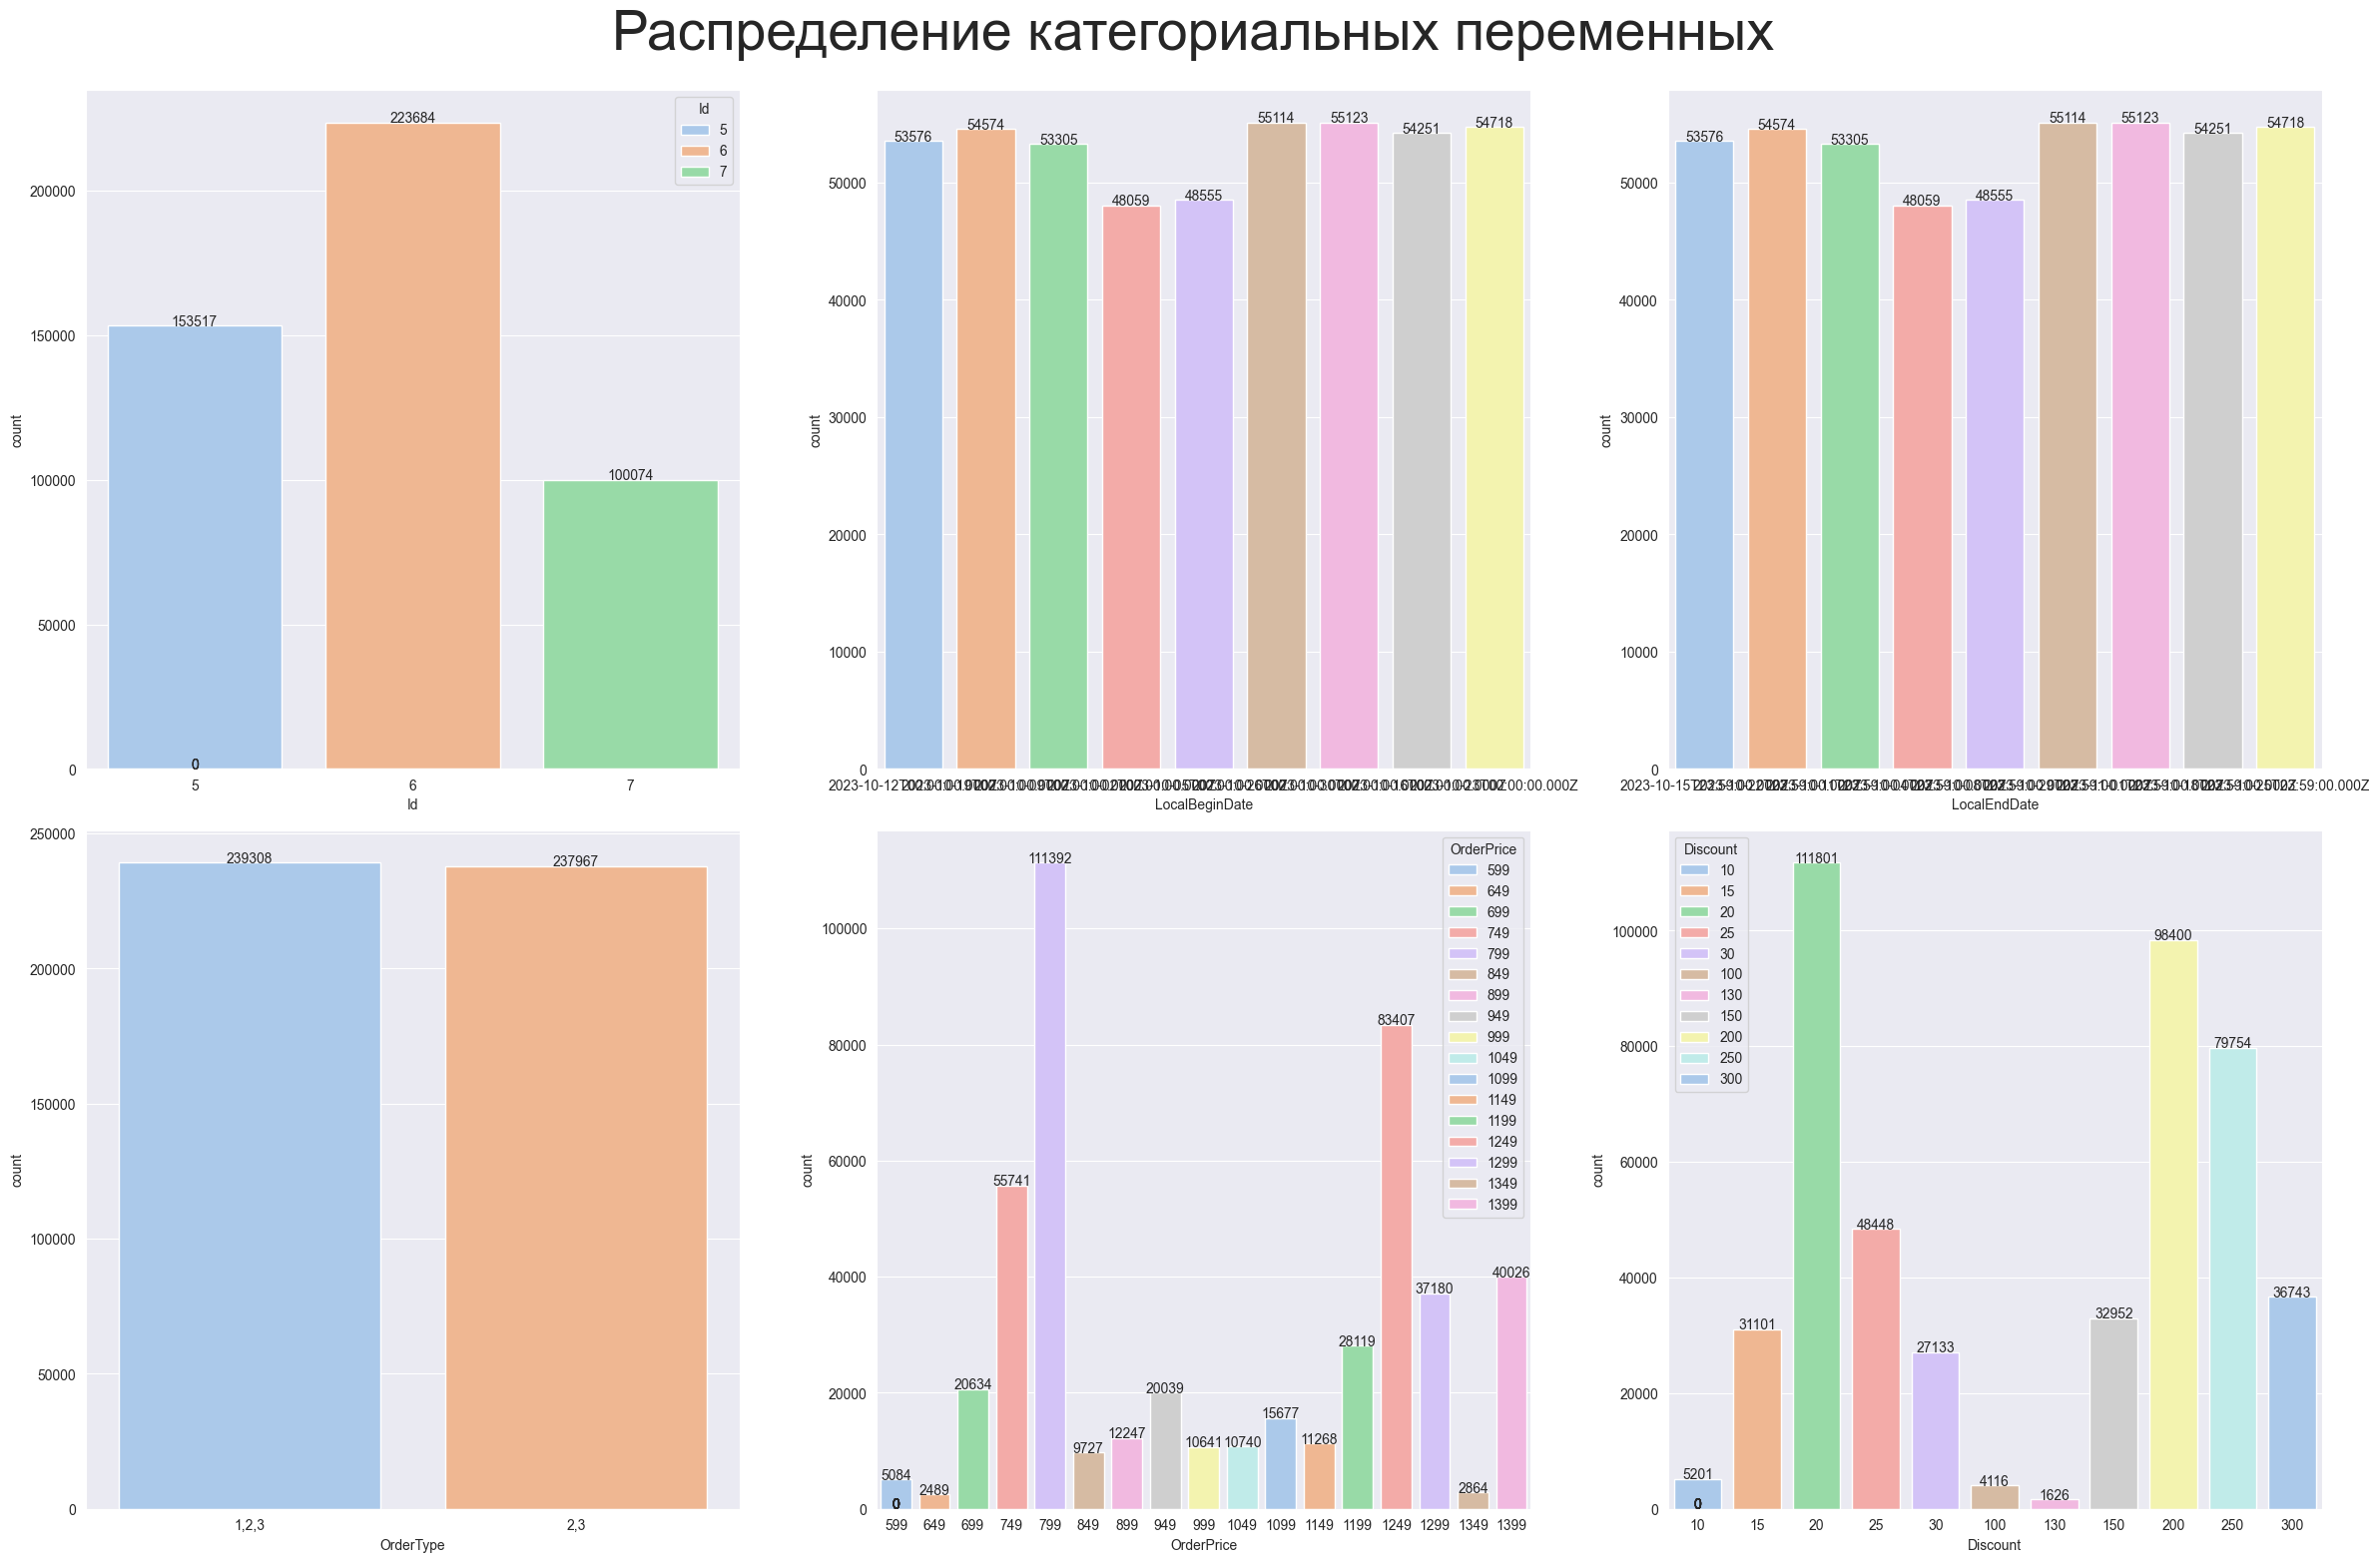

<Figure size 1800x4000 with 0 Axes>

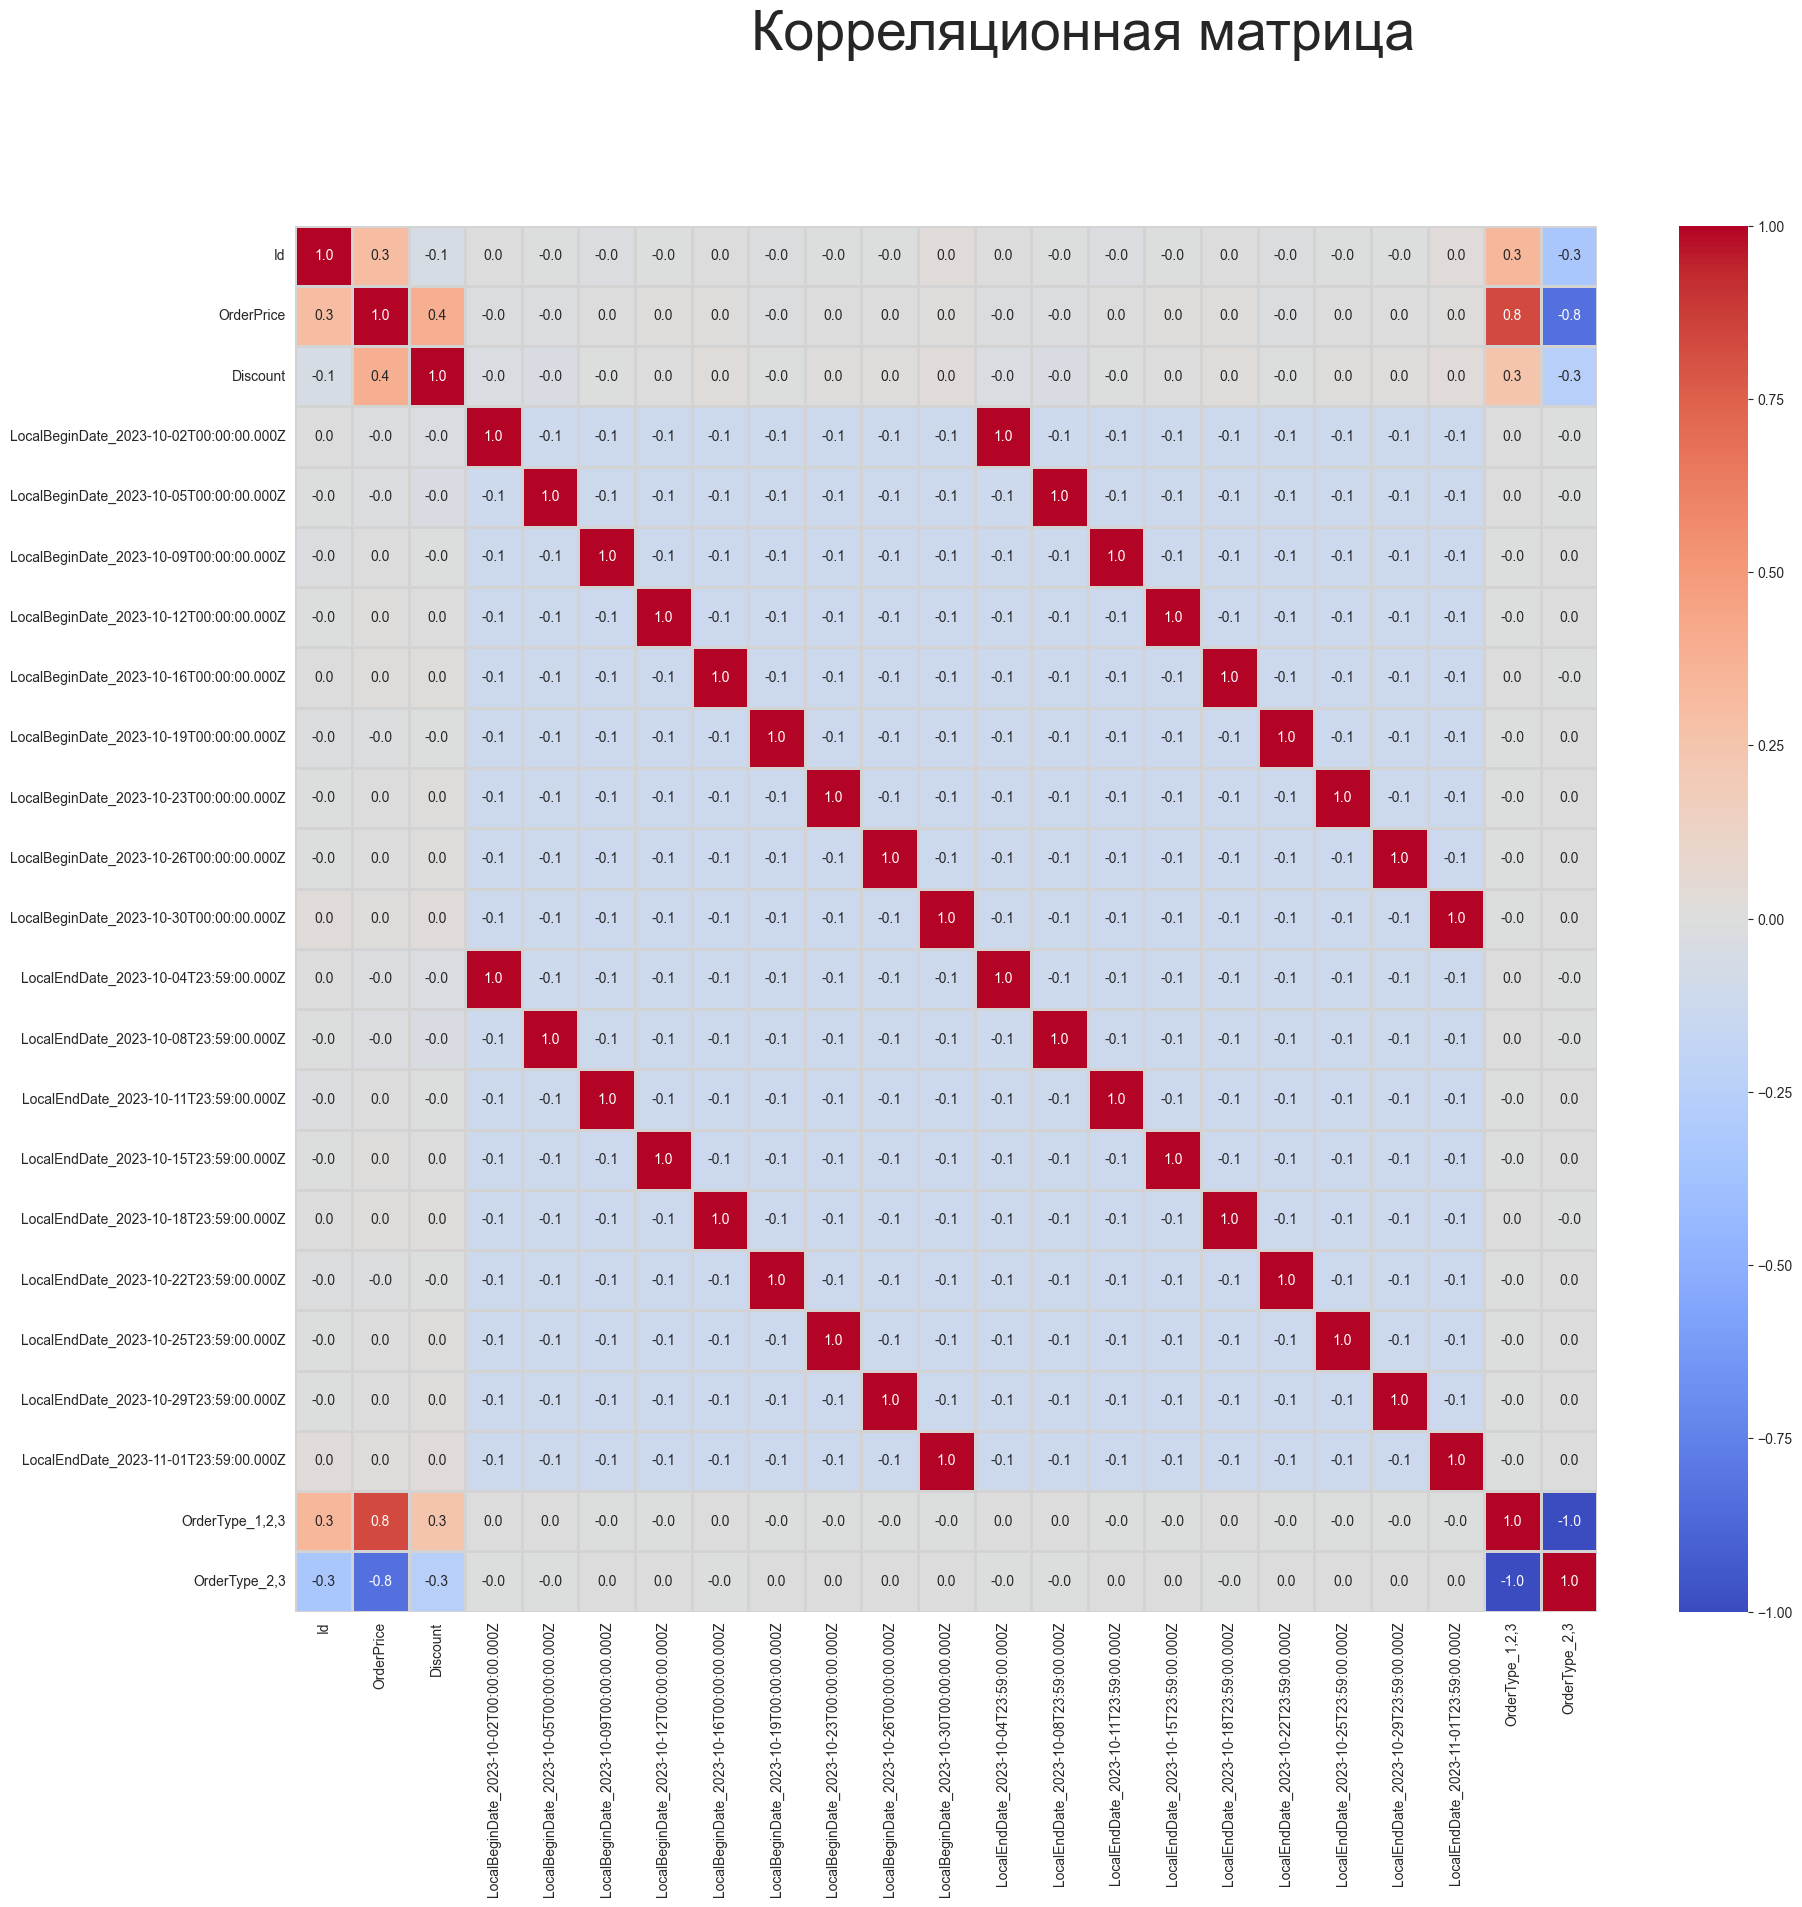

In [23]:
explore_eda(cl_pr_oct)

# Mobile Events

In [24]:
eda(mobile_events)

Описания численных признаков df:
+----+---------+----------------------------------+--------------------------------------+-------------+------------+--------------------------+
|    | index   | ClientUUId                       | VisitToken                           | EventName   | Platform   | Timestamp                |
|----+---------+----------------------------------+--------------------------------------+-------------+------------+--------------------------|
|  0 | count   | 3916654                          | 3916654                              | 3916654     | 3916654    | 3916654                  |
|  1 | unique  | 29838                            | 223964                               | 11          | 2          | 3912656                  |
|  2 | top     | 000D3A284715A95511E81811EF62AD07 | 108ACB83-BA5B-4123-987E-1D8E0D99B211 | screen_menu | ios        | 2023-10-14T06:00:21.558Z |
|  3 | freq    | 2257                             | 441                                  | 939487

Количество уникальных значений в каждой колонке:
ClientUUId - 29838 значений
VisitToken - 223964 значений
EventName - 11 значений
Platform - 2 значений
Timestamp - 3912656 значений


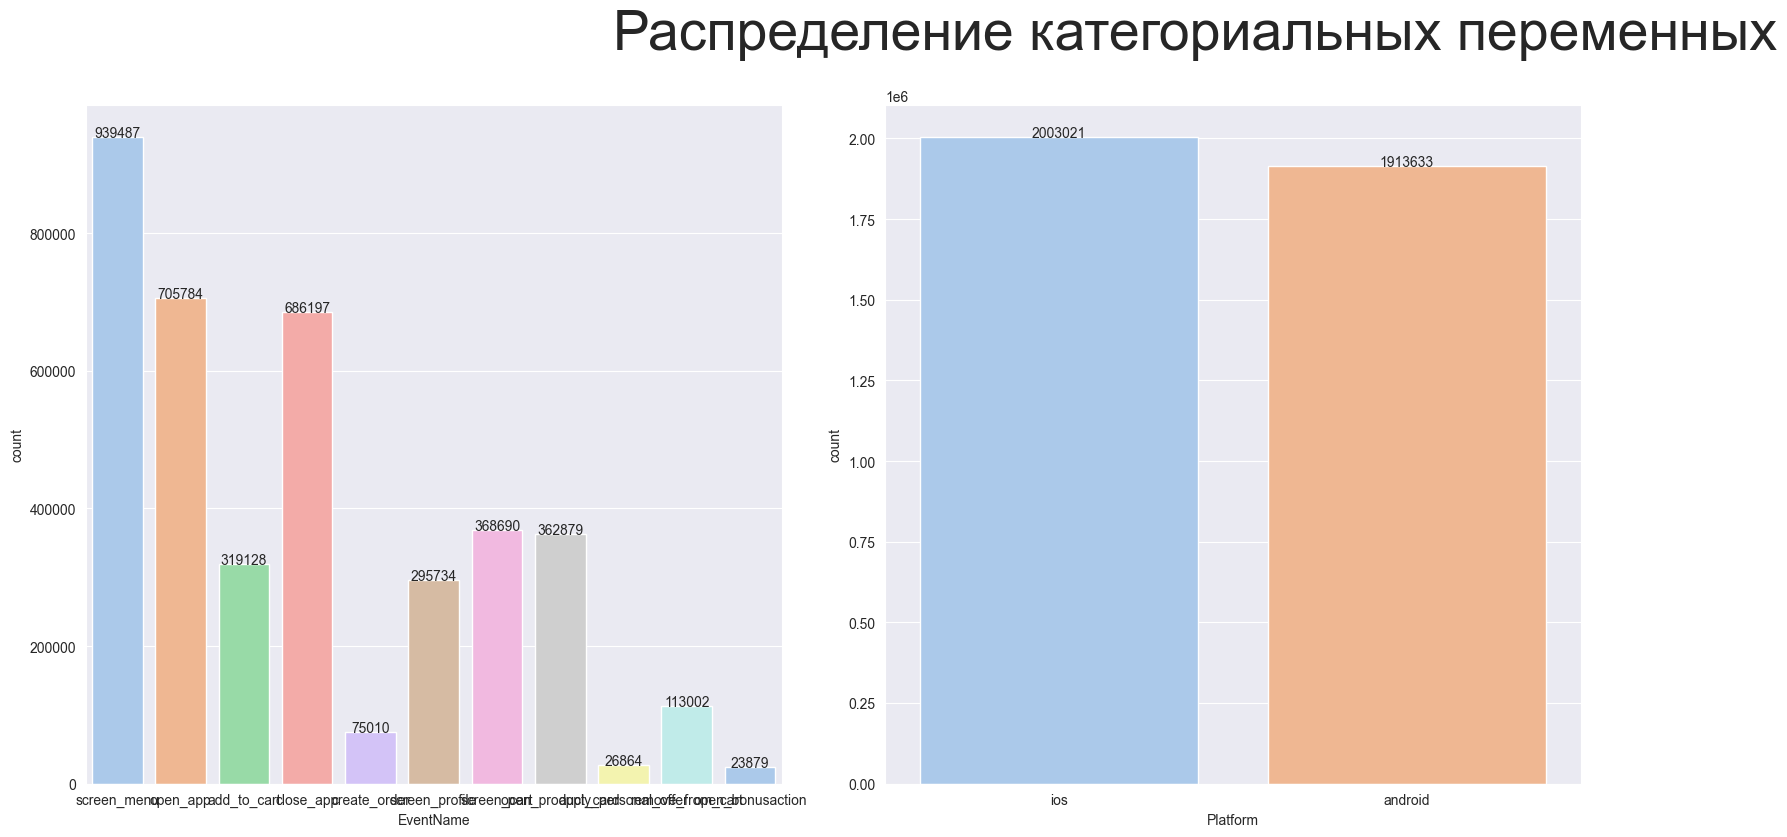

<Figure size 1800x4000 with 0 Axes>

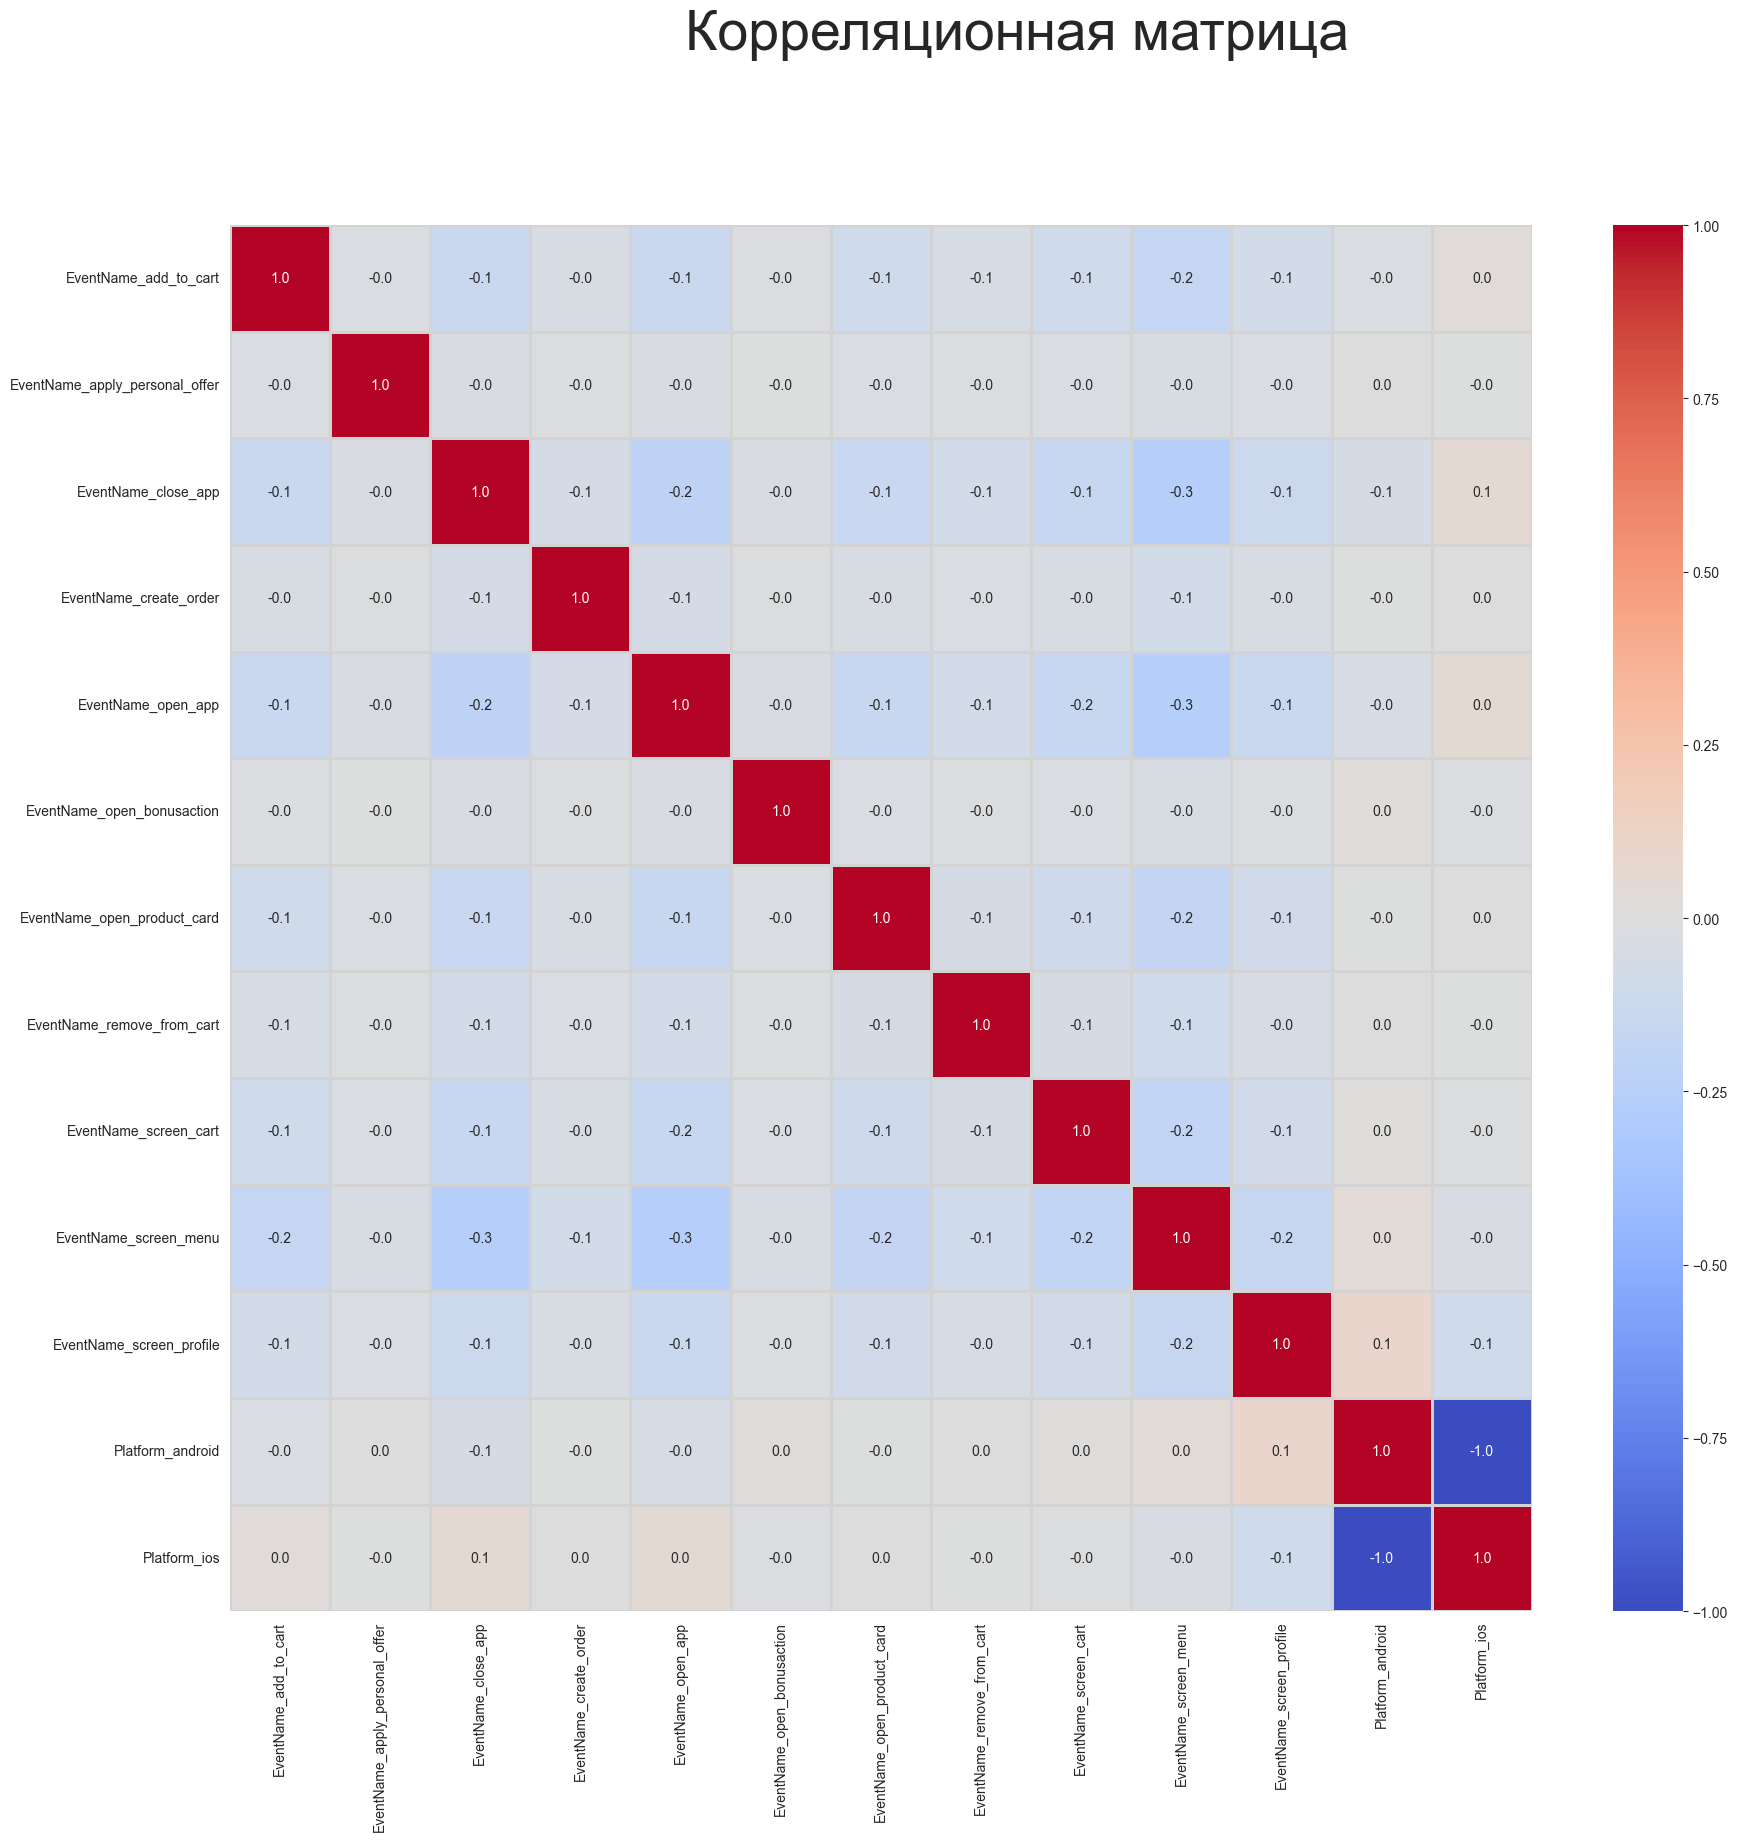

In [25]:
explore_eda(mobile_events)

# Orders

In [26]:
eda(orders)

Описания численных признаков df:
+----+---------+------------------+--------------------+------------------+---------------------+--------------+---------------------+-------------+---------------+--------------------+-------------------+---------------+---------------+
|    | index   |        addressId |   deliverySectorId |        NewClient |   ClientOrderNumber |   CategoryId |   ProductTotalPrice |   MenuPrice |    OrderState |   OrderPaymentType |   OrderTotalPrice |     OrderType |   apply_promo |
|----+---------+------------------+--------------------+------------------+---------------------+--------------+---------------------+-------------+---------------+--------------------+-------------------+---------------+---------------|
|  0 | count   | 488325           |         488325     | 611739           |         611739      | 611739       |          611739     |  611739     | 611739        |       611739       |         611739    | 611739        | 611739        |
|  1 | mean    

Количество уникальных значений в каждой колонке:
OrderUUId - 157621 значений
addressId - 2706 значений
deliverySectorId - 1259 значений
ClientUUId - 16337 значений
Date - 231 значений
SaleDate - 155628 значений
UnitUUId - 784 значений
NewClient - 2 значений
ClientOrderNumber - 616 значений
ProductUUId - 507 значений
CategoryId - 7 значений
ProductTotalPrice - 29137 значений
MenuPrice - 927 значений
OrderState - 2 значений
OrderPaymentType - 3 значений
OrderTotalPrice - 3814 значений
OrderType - 3 значений
apply_promo - 2 значений


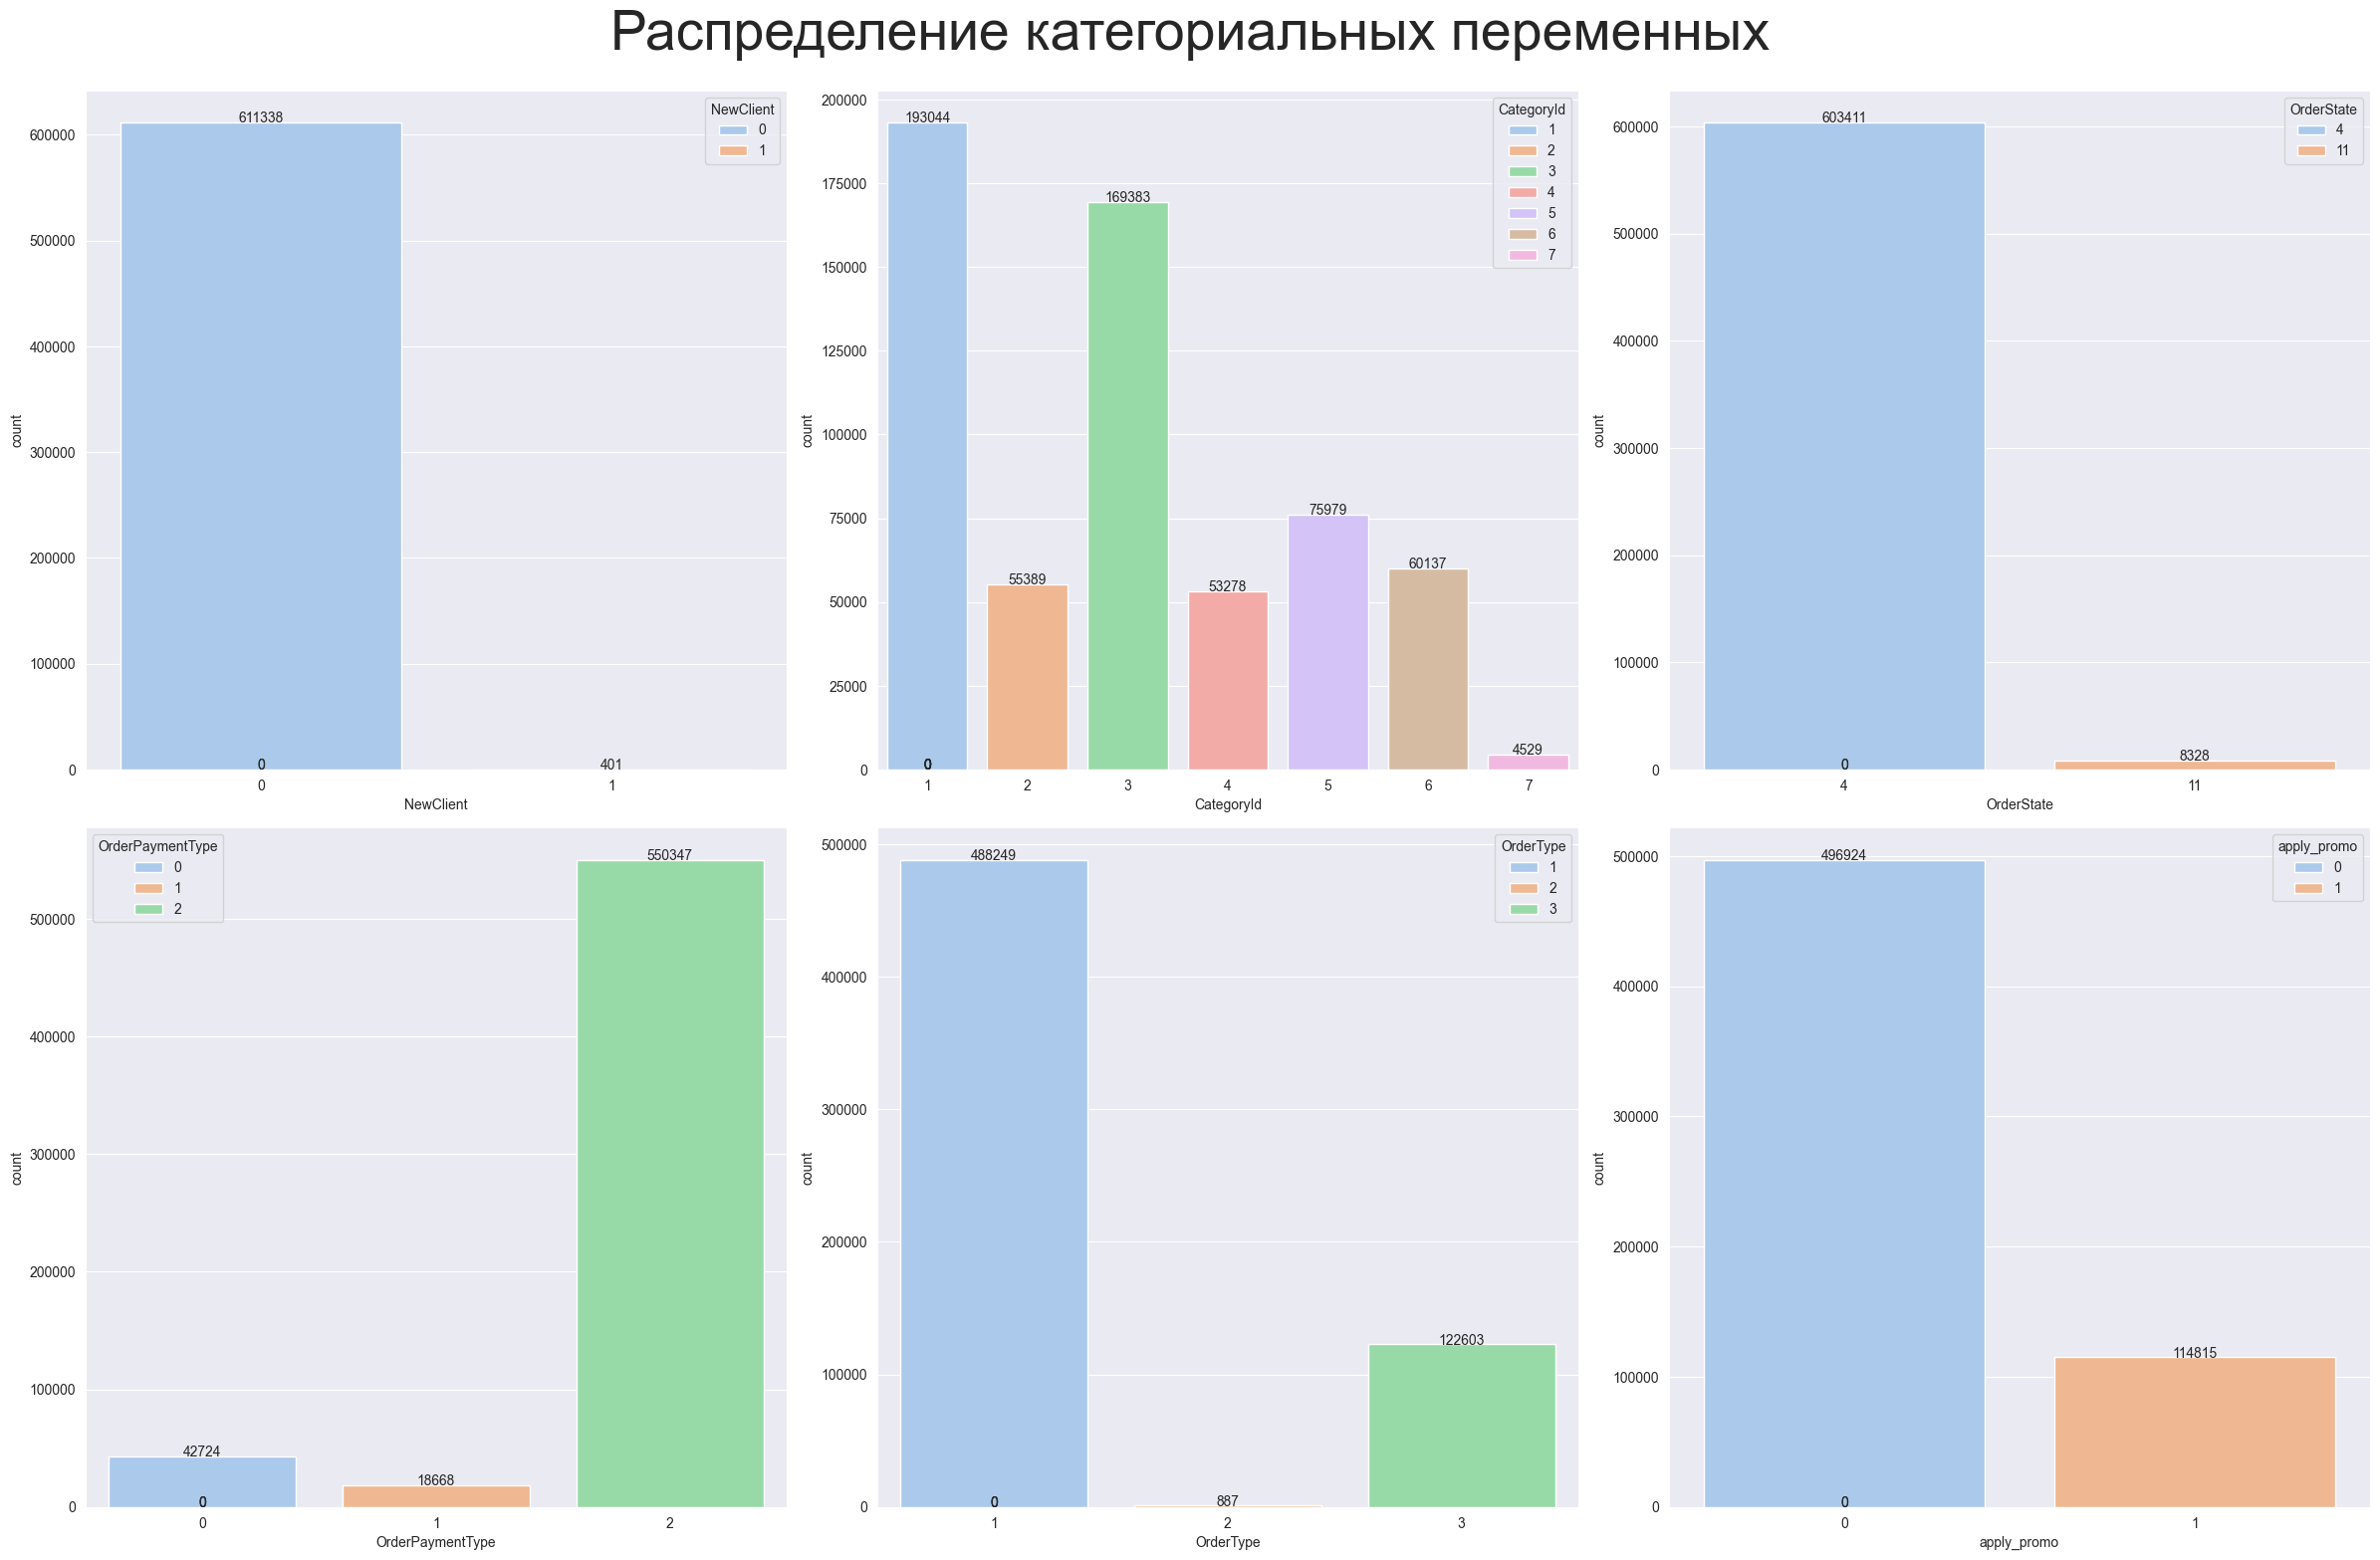

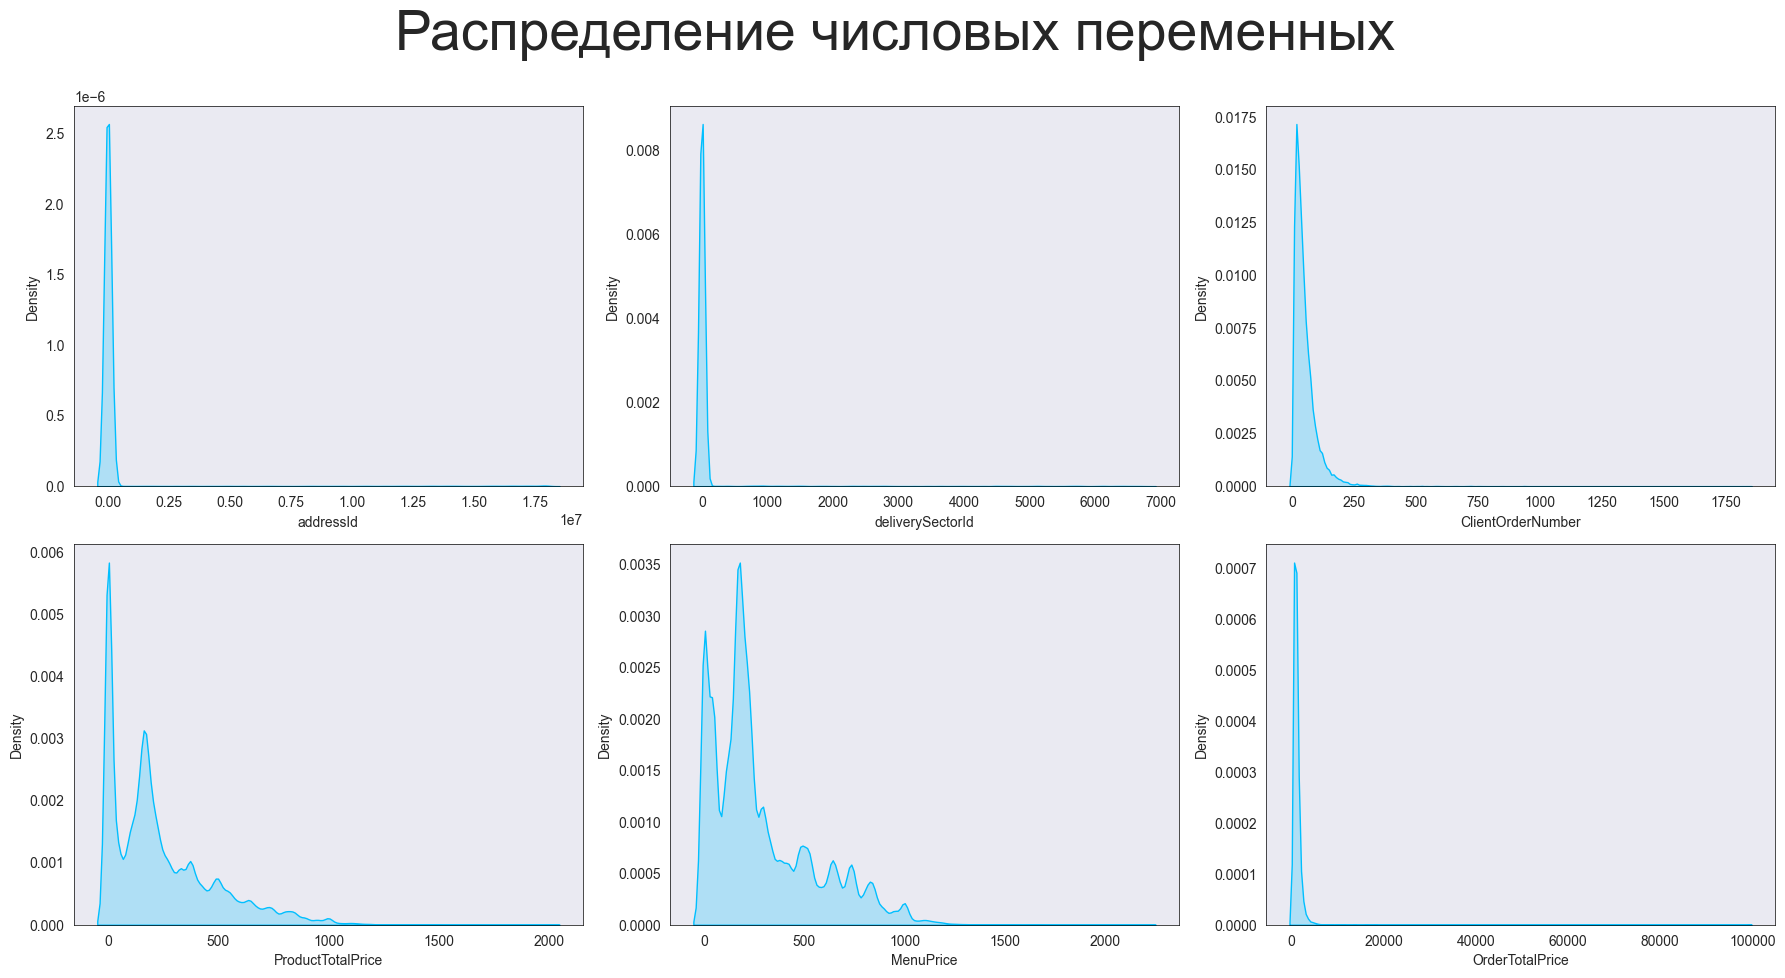

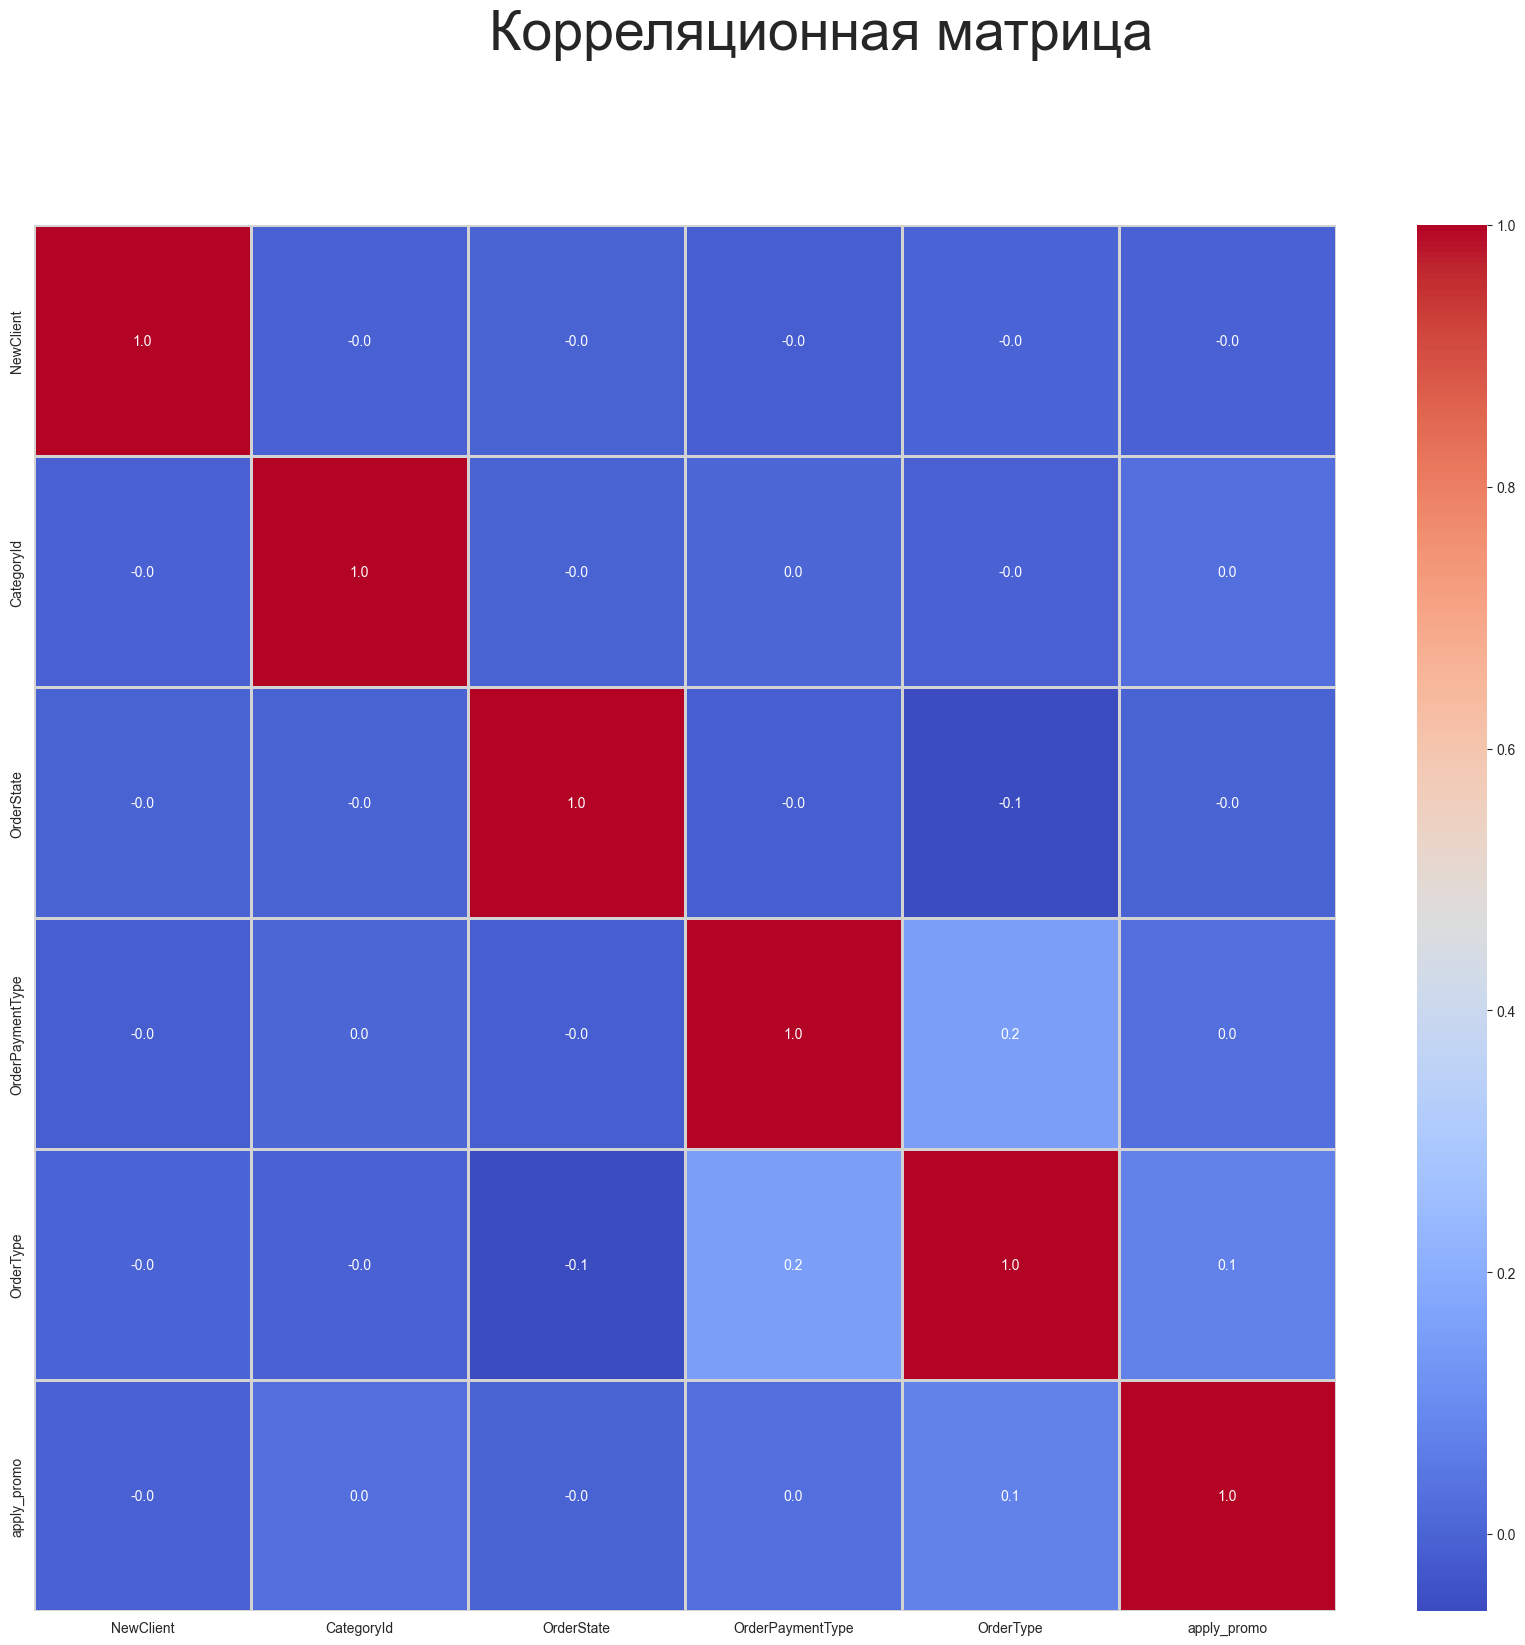

In [27]:
explore_eda(orders)

# Train

In [28]:
eda(train)

Описания численных признаков df:
+----+---------+-------------+--------------+------------+---------------+
|    | index   |          Id |   OrderPrice |   Discount |   apply_promo |
|----+---------+-------------+--------------+------------+---------------|
|  0 | count   | 27741       |     27741    | 27741      | 27741         |
|  1 | mean    |     6.08983 |       943.22 |   162.695  |     0.0298115 |
|  2 | std     |     0.86196 |       225.76 |    86.3357 |     0.17007   |
|  3 | min     |     5       |       599    |    15      |     0         |
|  4 | 25%     |     5       |       799    |   100      |     0         |
|  5 | 50%     |     6       |       799    |   200      |     0         |
|  6 | 75%     |     7       |      1249    |   200      |     0         |
|  7 | max     |     7       |      1249    |   300      |     1         |
+----+---------+-------------+--------------+------------+---------------+ 

Пустые значения в колонках:
+----+----------------+--------------

Количество уникальных значений в каждой колонке:
ClientUUId - 18598 значений
Id - 3 значений
OrderType - 2 значений
LocalBeginDate - 1 значений
LocalEndDate - 1 значений
OrderPrice - 14 значений
Discount - 10 значений
apply_promo - 2 значений


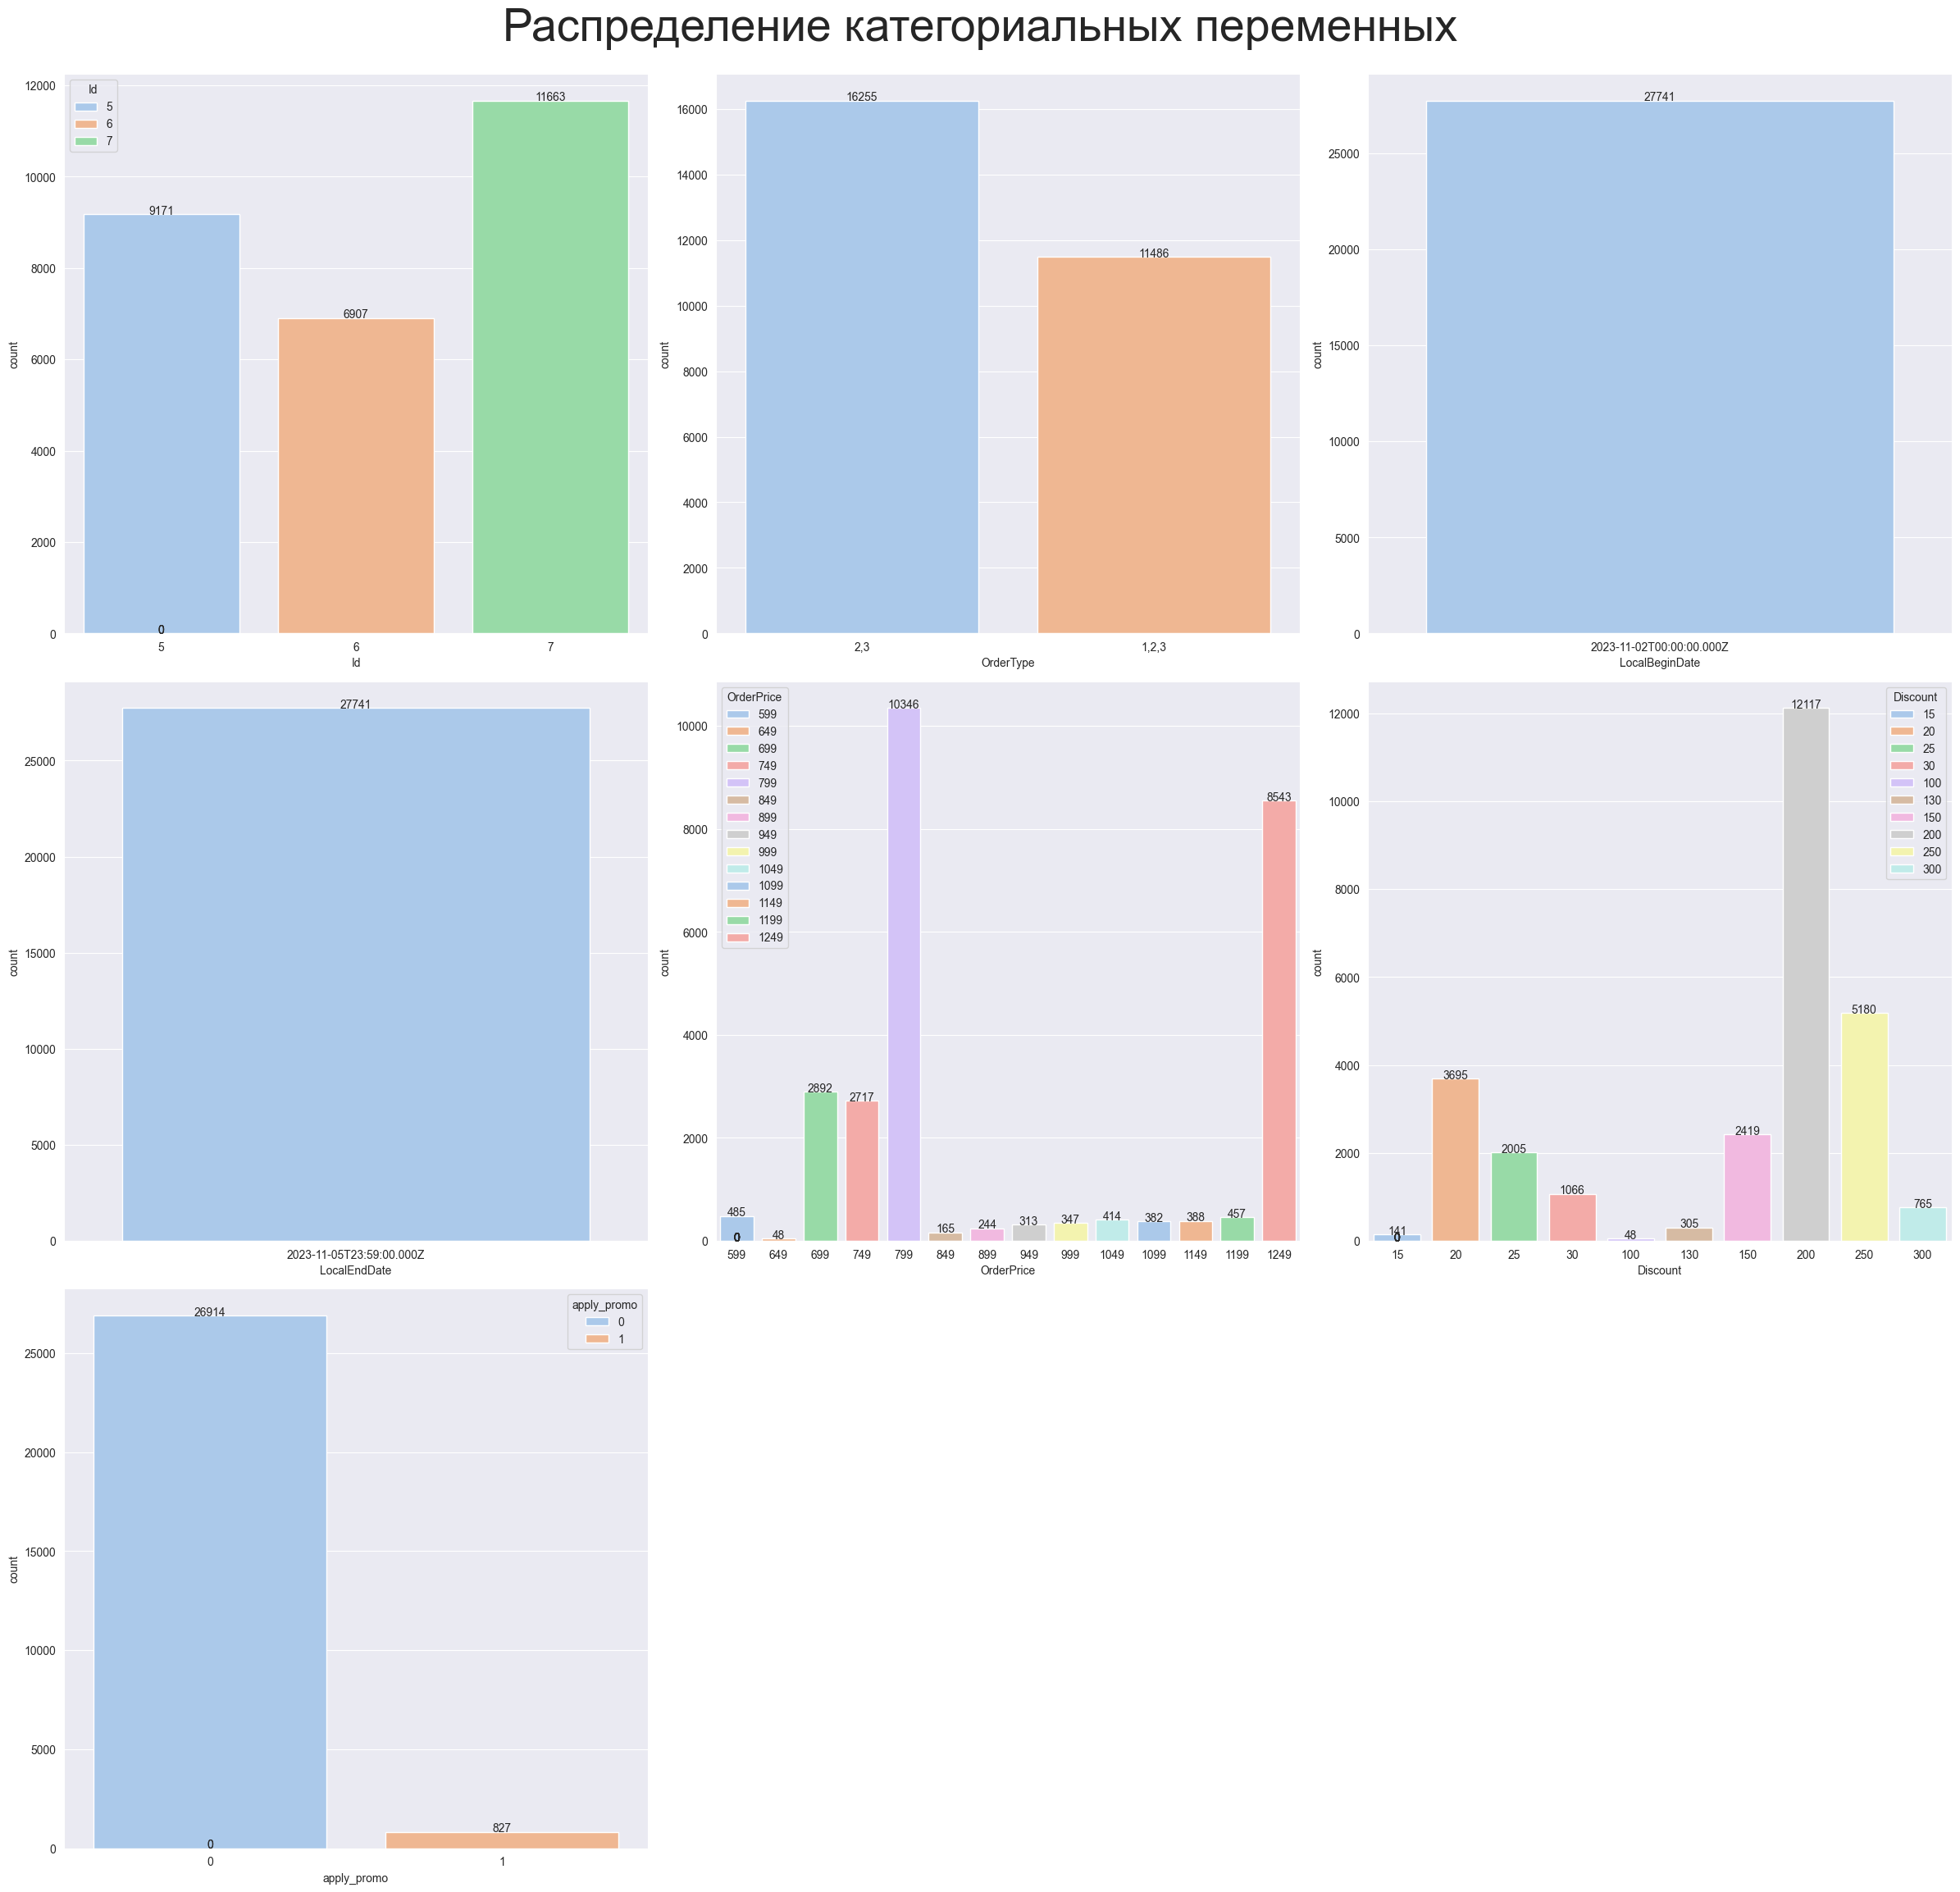

<Figure size 1800x4000 with 0 Axes>

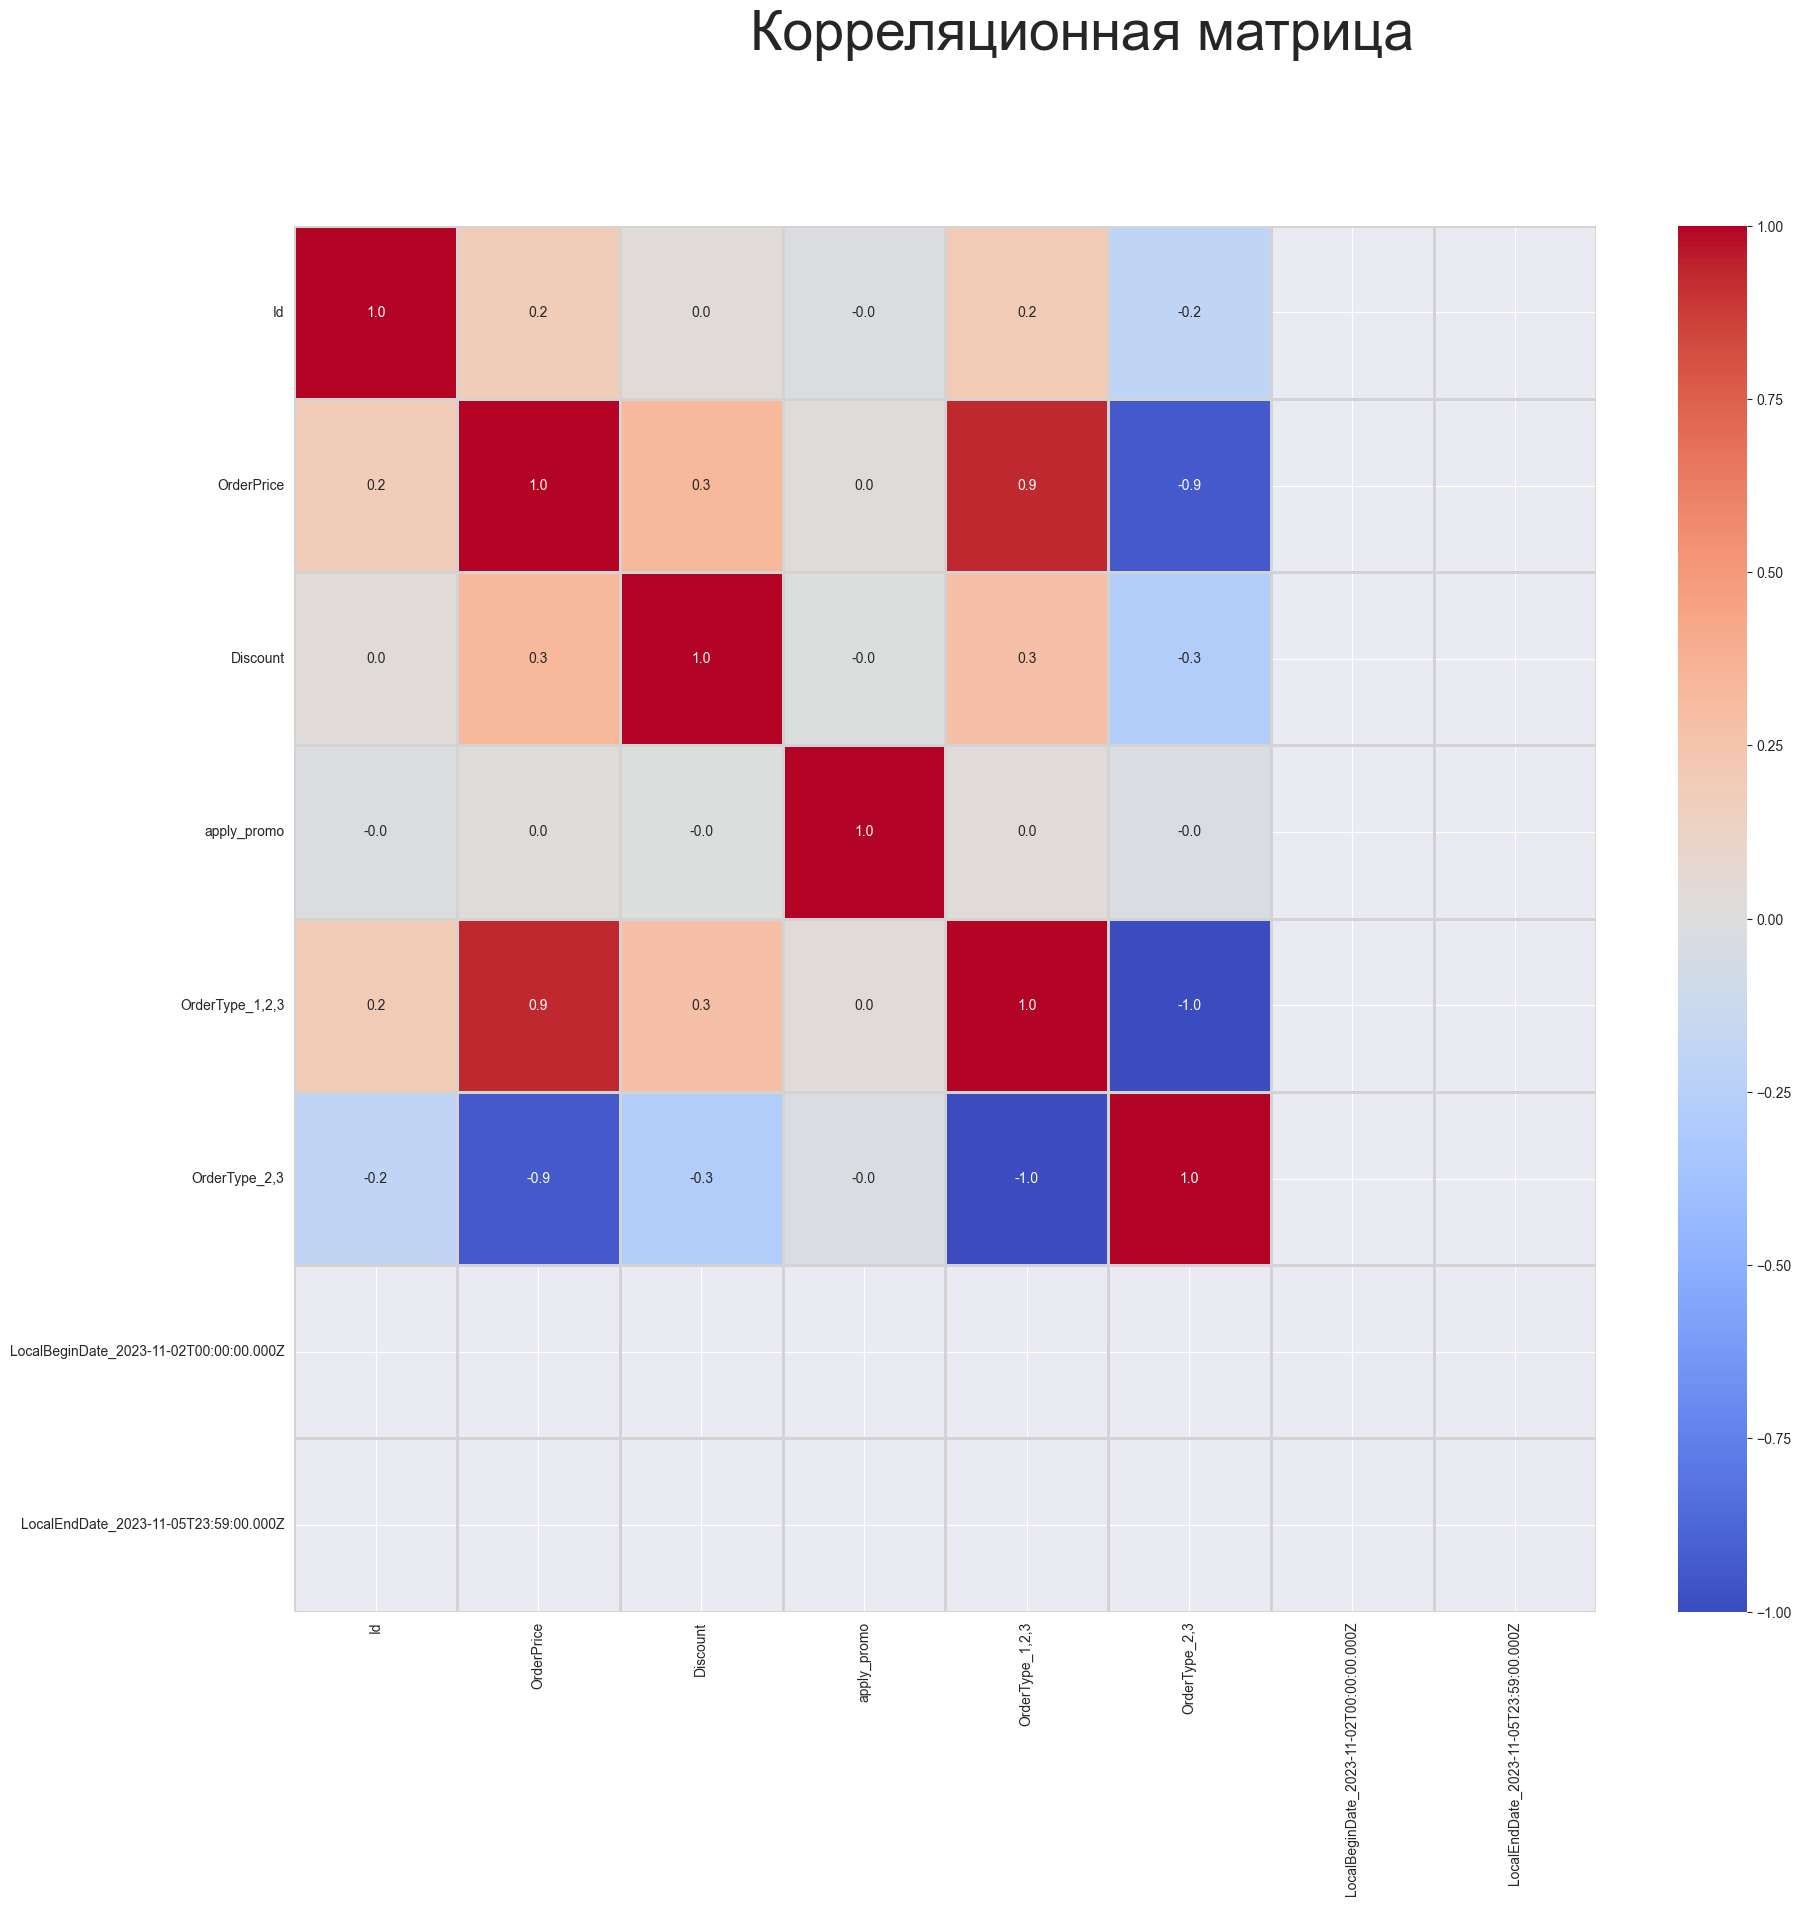

In [29]:
explore_eda(train)

# Test

In [30]:
eda(test)

Описания численных признаков df:
+----+---------+-------------+--------------+------------+
|    | index   |          Id |   OrderPrice |   Discount |
|----+---------+-------------+--------------+------------|
|  0 | count   | 6806        |     6806     |  6806      |
|  1 | mean    |    6.11314  |      943.997 |   162.063  |
|  2 | std     |    0.855366 |      225.963 |    87.2277 |
|  3 | min     |    5        |      599     |    15      |
|  4 | 25%     |    5        |      799     |    30      |
|  5 | 50%     |    6        |      799     |   200      |
|  6 | 75%     |    7        |     1249     |   200      |
|  7 | max     |    7        |     1249     |   300      |
+----+---------+-------------+--------------+------------+ 

Пустые значения в колонках:
+----+----------------+------------------+
|    | Column         |   Missing Values |
|----+----------------+------------------|
|  0 | ClientUUId     |                0 |
|  1 | Id             |                0 |
|  2 | OrderTy

Количество уникальных значений в каждой колонке:
ClientUUId - 4559 значений
Id - 3 значений
OrderType - 2 значений
LocalBeginDate - 1 значений
LocalEndDate - 1 значений
OrderPrice - 14 значений
Discount - 10 значений


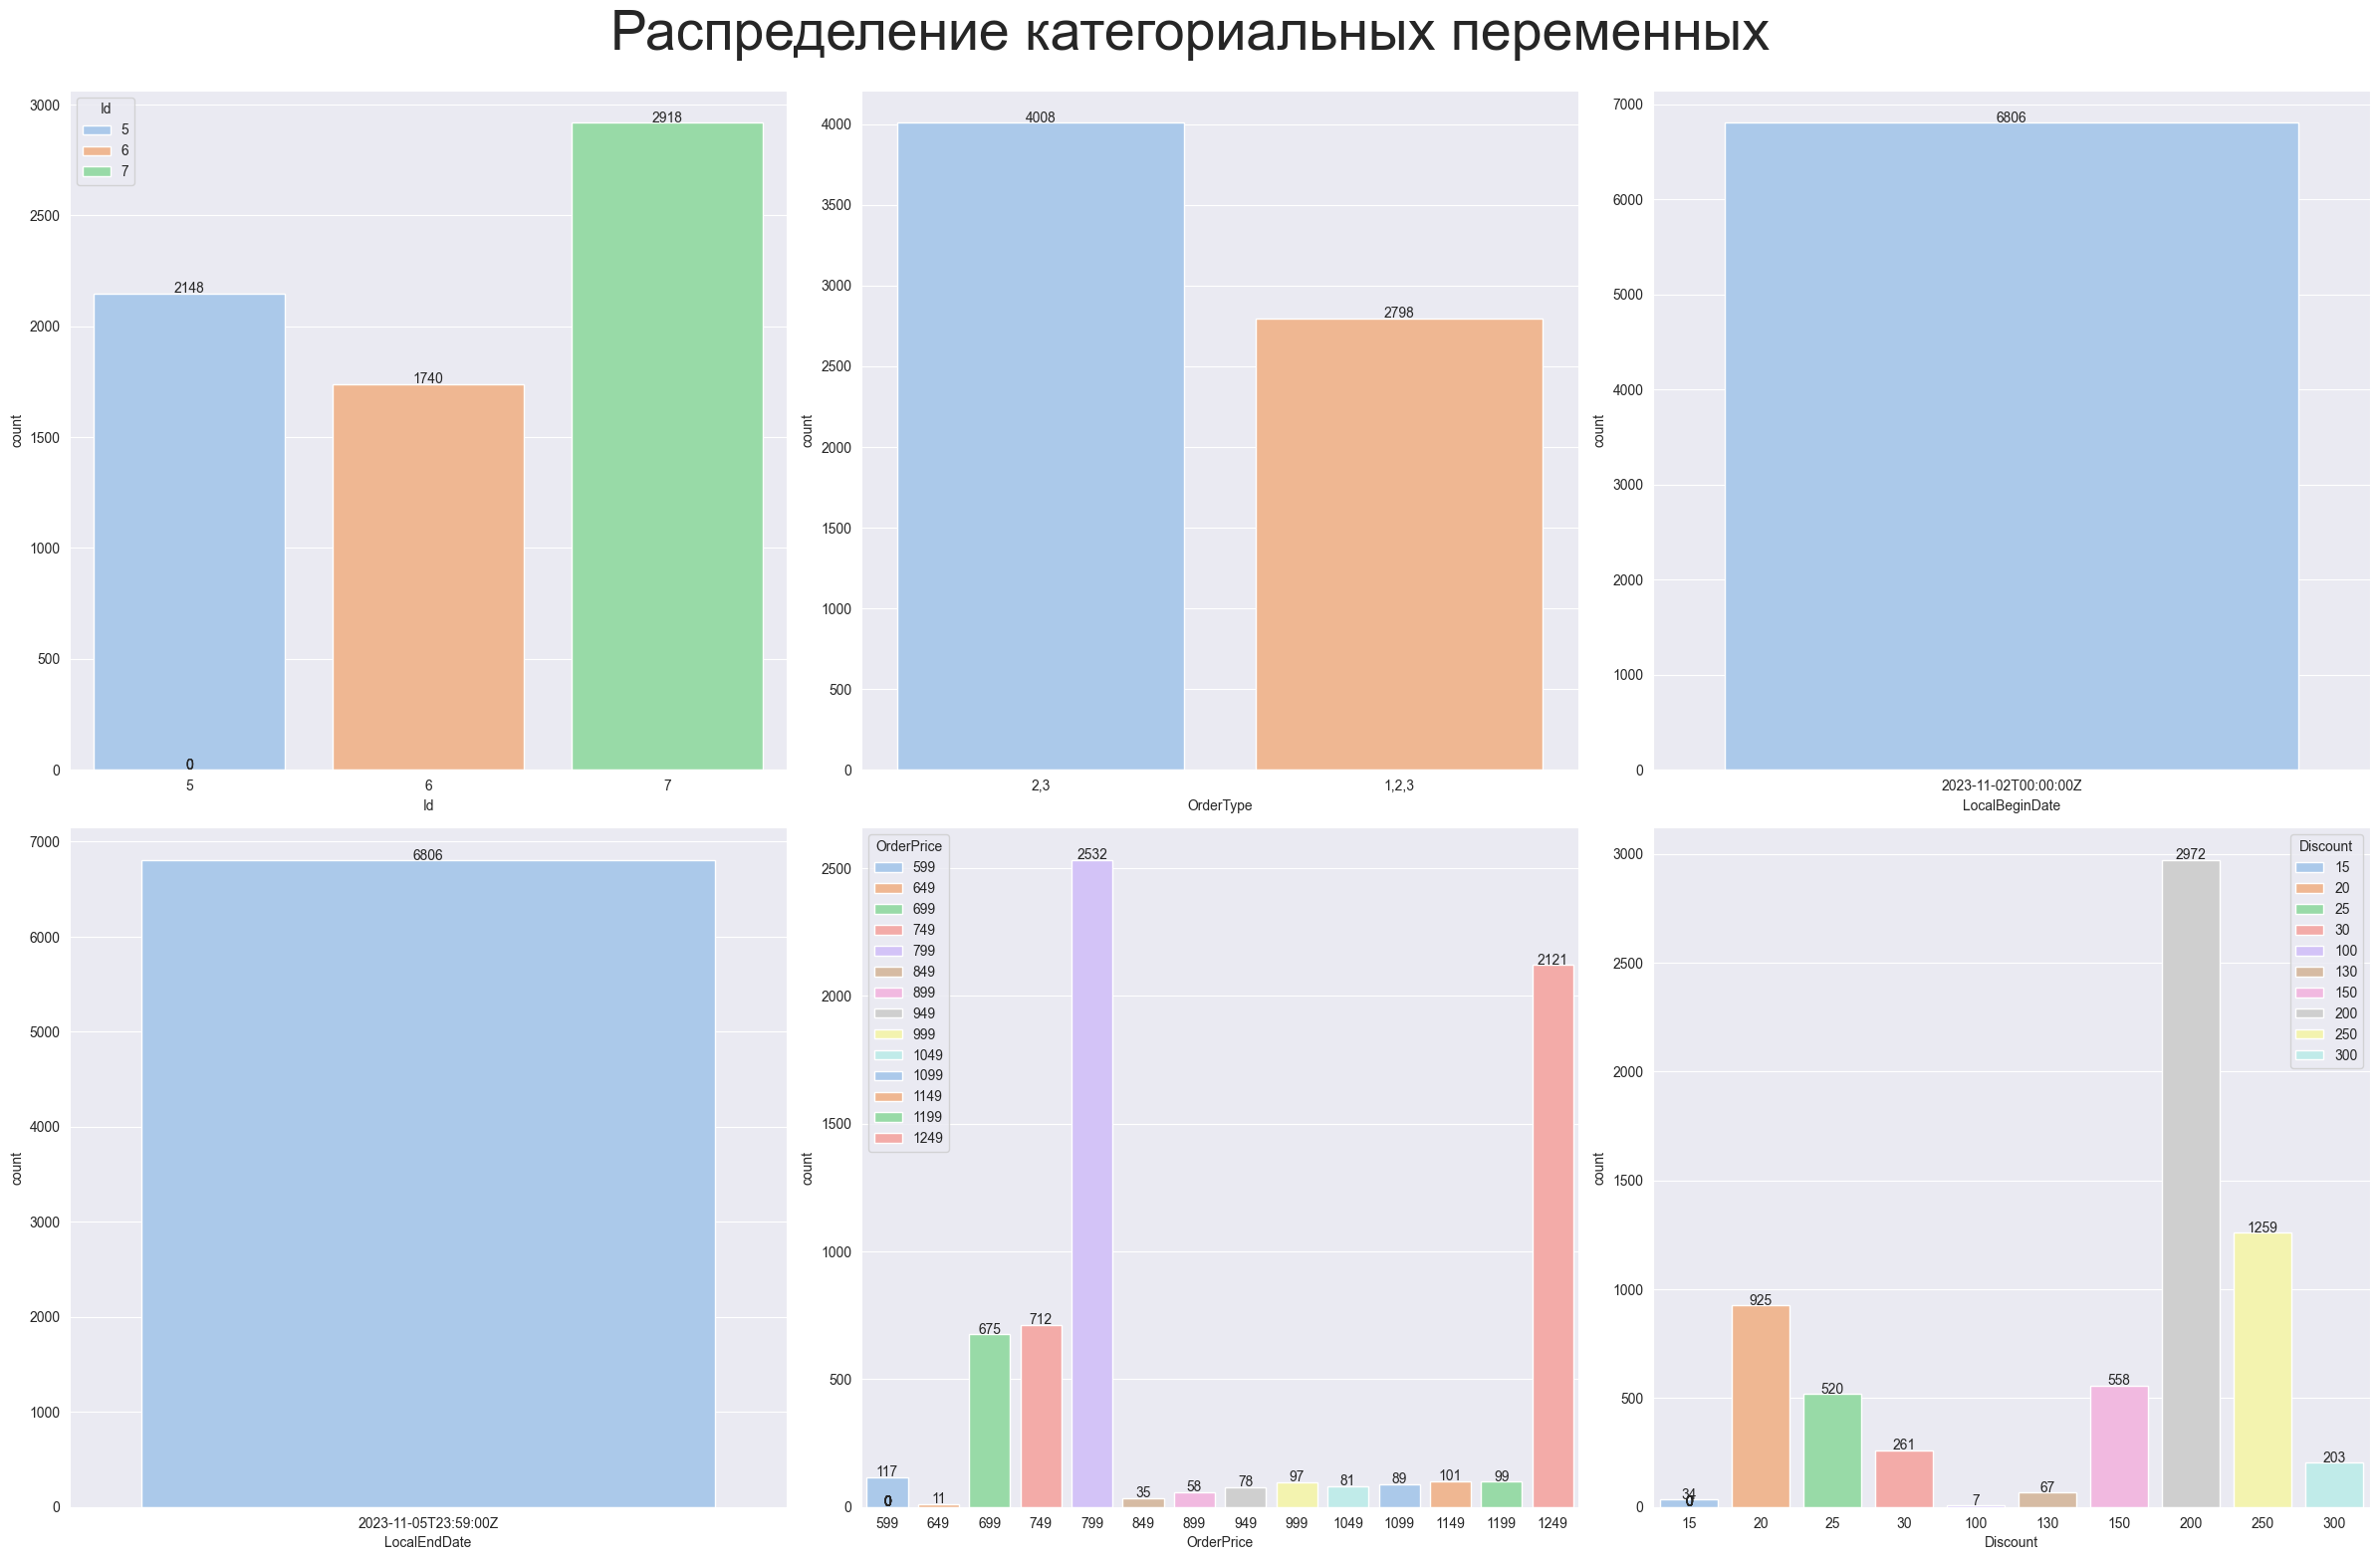

<Figure size 1800x4000 with 0 Axes>

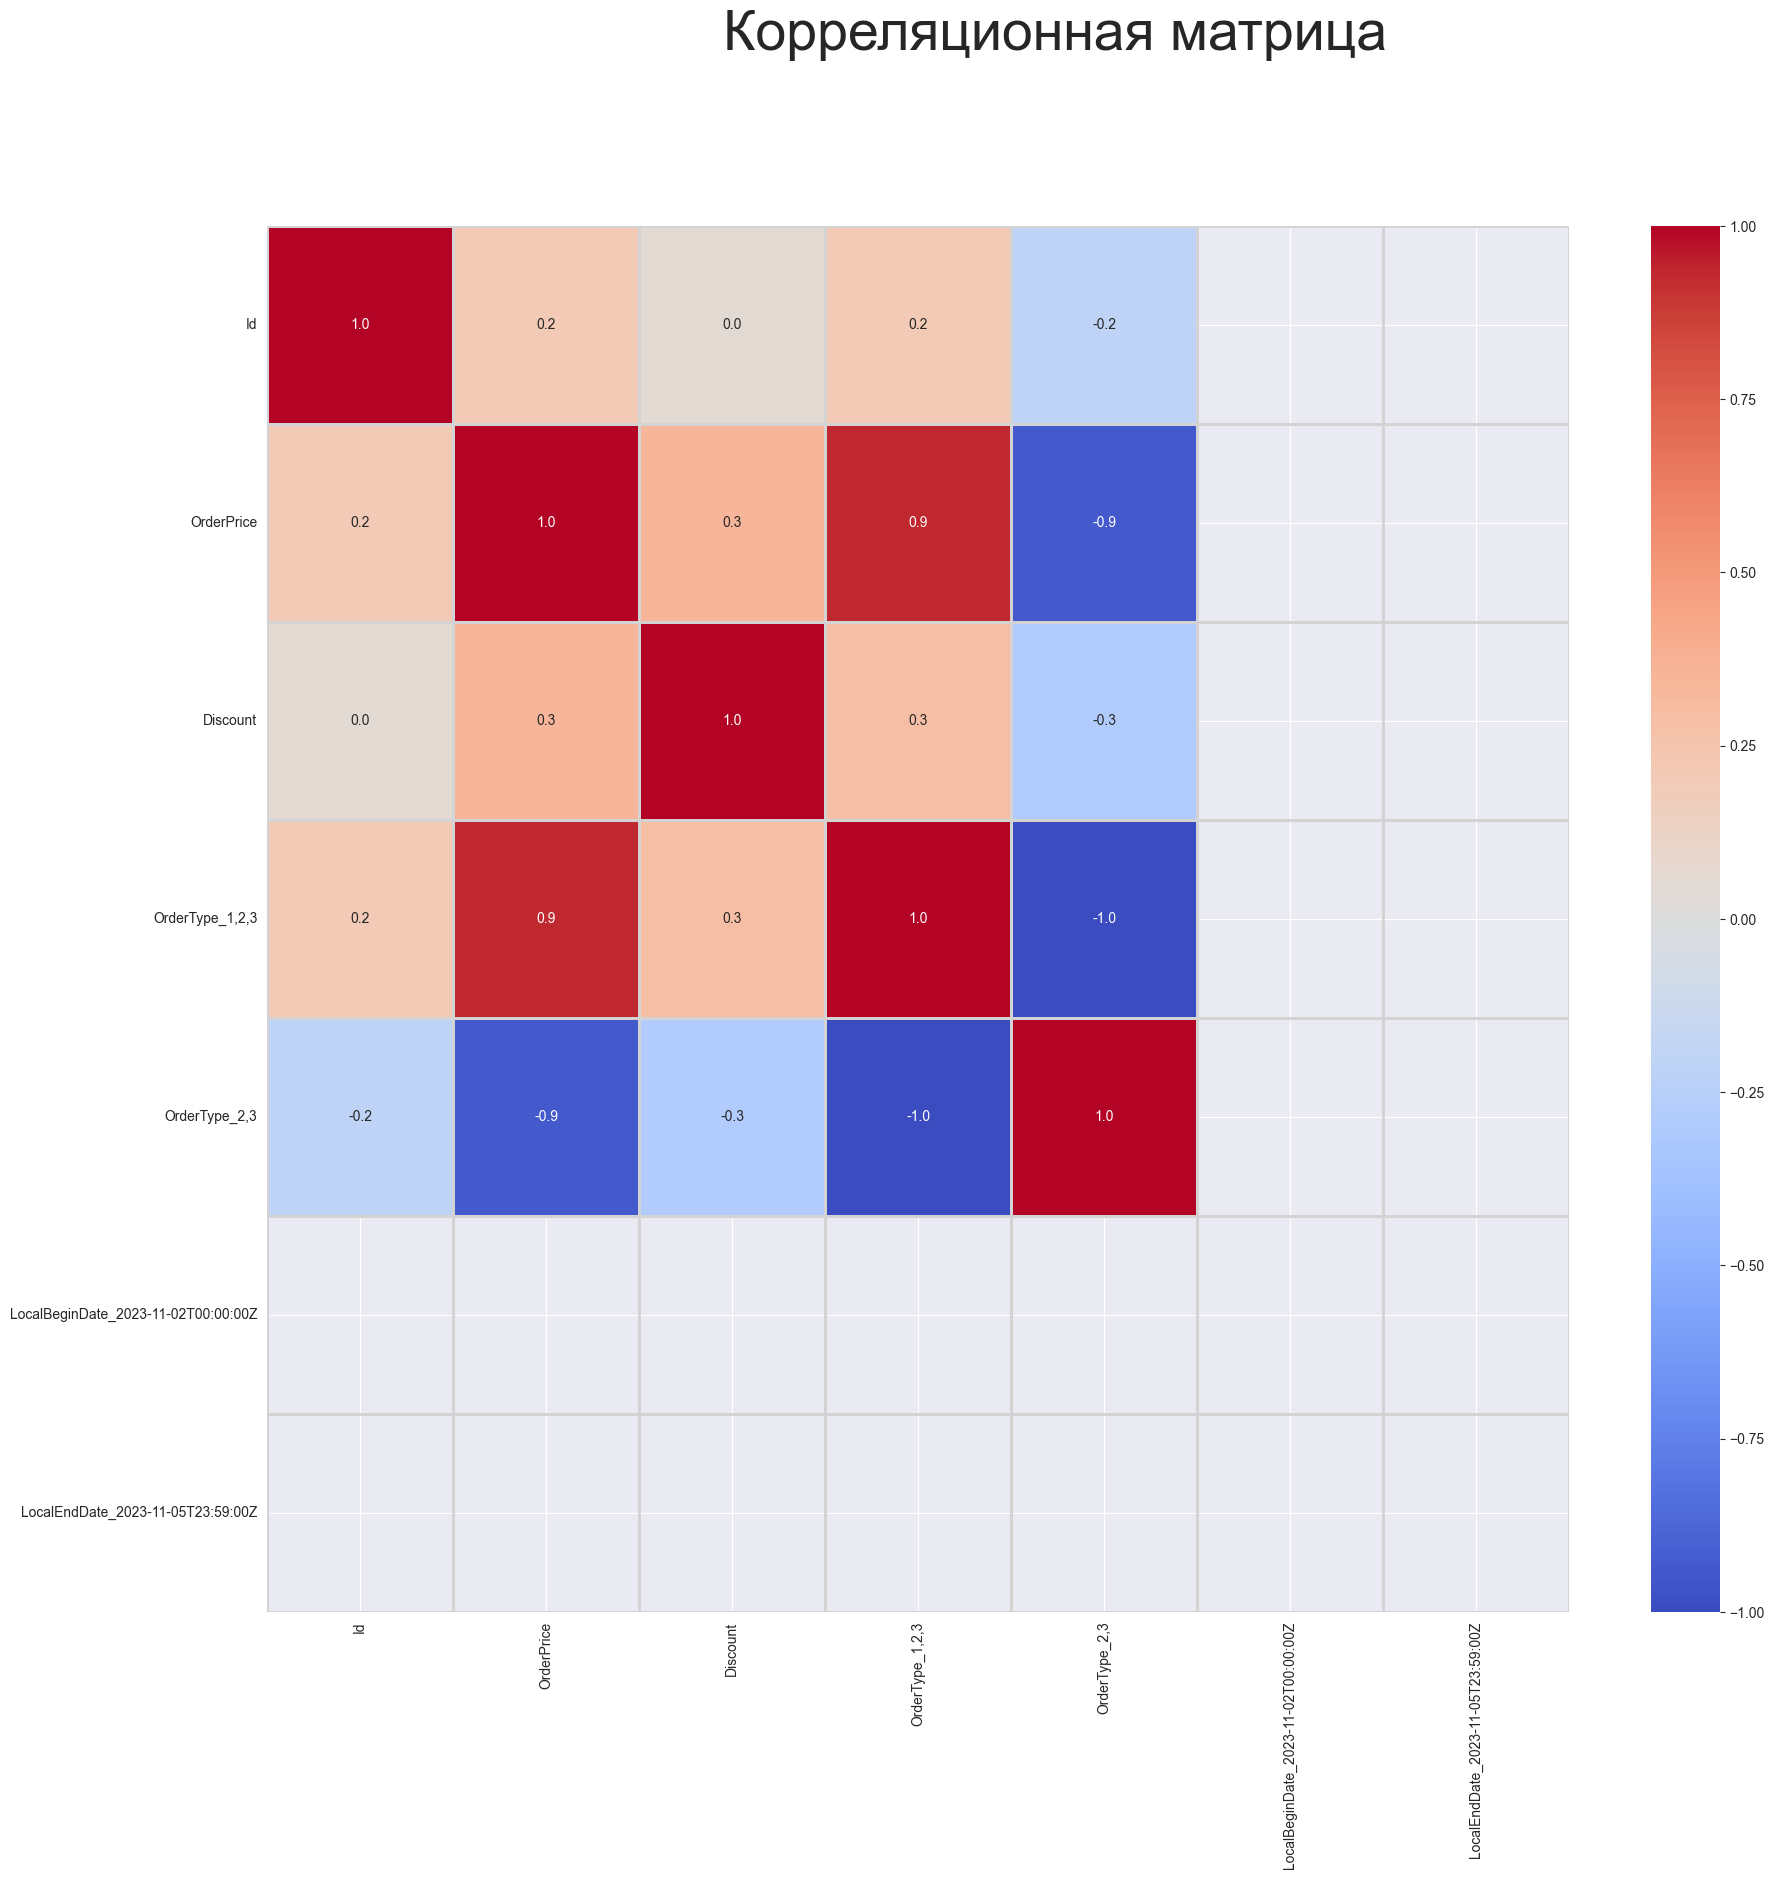

In [31]:
explore_eda(test)